synthe_size_me


In [1]:
#Synthe_size_me

In [1]:
#print("Hello World")
print("Hello World")

Hello World


In [6]:
#Load imports
import os
import sys
from synthesizers import Load, pipeline

In [2]:
#Testing
Load("mstz/breast").Synthesize(split_size=0.8, gen_count=10000, eval_target_col="is_cancer", save_name="breast.xlsx", save_key="synth")

Generating train split: 683 examples [00:00, 3844.50 examples/s]
  5%|▍         | 468/10000 [01:45<29:15,  5.43it/s]  

: 

In [3]:
Load("mstz/breast").Synthesize(split_size=0.8, gen_count=100, eval_target_col="is_cancer", save_name="breast.xlsx", save_key="synth")

 11%|█         | 1099/10000 [03:34<29:00,  5.11it/s]  


[{'train':      clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  3                        3                         2   
1                  5                        1                         1   
2                  5                        1                         1   
3                  5                        1                         1   
4                  8                        6                         7   
..               ...                      ...                       ...   
541                1                        1                         1   
542                1                        1                         1   
543                5                        4                         5   
544                1                        1                         1   
545                6                        1                         3   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                   

In [7]:
Load("mstz/breast").Synthesize(split_size=[0.8, 0.9], gen_count=[1000, 10000], eval_target_col="is_cancer")

  3%|▎         | 329/10000 [01:00<29:36,  5.44it/s]  


RuntimeError: NaNs detected in the discriminator loss

In [8]:
Load("mstz/breast").Synthesize(split_size=[0.8, 0.9], train_plugin=["adsgan", "ctgan"], gen_count=[1000, 10000], eval_target_col="is_cancer", save_name="breast_multiple")

  5%|▍         | 94/2000 [00:17<05:45,  5.51it/s]


RuntimeError: NaNs detected in the generator loss

In [9]:
state = Load("breast.xlsx").Split(size=0.2).Train(plugin="tvae").Generate(count=[100, 1000, 10000, 100000]).Save(name=f"breast.csv", key="synth")

 40%|████      | 400/1000 [00:24<00:36, 16.40it/s]


In [10]:
state = Load("breast.xlsx").Split(size=0.2).Train(plugin="tvae")
for count in (100, 1000, 10000, 100000):
    state.Generate(count=count).Save(name=f"breast-{count}.csv", key="synth")

 50%|█████     | 500/1000 [00:30<00:30, 16.40it/s]


In [11]:
pipeline("synthesize", eval_target_col="is_cancer")("breast.xlsx")

  3%|▎         | 349/10000 [00:23<11:03, 14.55it/s]


[{'train':     Unnamed: 0  clump_thickness  uniformity_of_cell_size  \
0            9                7                       10   
1           87                8                        5   
2           86                7                        5   
3           48                7                       10   
4            5                7                        9   
..         ...              ...                      ...   
75           8                8                        9   
76          74                8                        5   
77          33                7                        5   
78           0                3                        1   
79          61                5                        1   

    uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                         10                 10                           10   
1                          4                  3                            4   
2                          3

In [12]:
pipeline("synthesize", train_plugin="bayesian_network", eval_target_col="is_cancer")("breast.xlsx")

03/06/2024 16:45:01:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:01:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.


[{'train':     Unnamed: 0  clump_thickness  uniformity_of_cell_size  \
0            3                4                        2   
1           18                3                        1   
2           84                2                        1   
3           78                4                        1   
4           70                3                        1   
..         ...              ...                      ...   
75          74                8                        5   
76          39                5                        5   
77           6                5                        1   
78          21                4                        1   
79          36                3                        1   

    uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                          1                  1                            2   
1                          1                  1                            2   
2                          1

In [13]:
pipeline("evaluate", target_col="is_cancer")(pipeline("generate", count=10000)(pipeline("train", plugin="bayesian_network")("mstz/breast")))

03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: Membership inference attack metric did not run, holdout data was not supplied!


[{'train': Dataset({
    features: ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'is_cancer'],
    num_rows: 683
}), 'test': None, 'synth':       clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                   4                        2                         2   
1                   4                        4                         5   
2                   2                        1                         1   
3                   1                        1                         1   
4                   5                        1                         3   
...               ...                      ...                       ...   
9995                4                        3                         1   
9996                8                        1                         1   
9997                1          

In [21]:
state = Load("mstz/breast").Split(size=0.8).Train().Save("breast_state")

  6%|▋         | 649/10000 [01:58<28:28,  5.47it/s]  


In [25]:
# from README.md
from synthesizers import Load
Load("mstz/breast").Synthesize(split_size=0.8, gen_count=10000, eval_target_col="is_cancer", save_name="breast.xlsx", save_key="synth")
Load("mstz/breast").Split(size=0.8).Train().Generate(count=10000).Evaluate(target_col="is_cancer").Save(name="breast.xlsx", key="synth")
state = Load("mstz/breast").Split(size=0.8).Train()
for count in (100, 1000, 10000, 100000):
    state.Generate(count=count).Save(name=f"breast-{count}.csv", key="synth")
state = Load("mstz/breast").Split(size=0.8).Train().Save("breast_state")
Load("breast_state").Generate(count=10000).Save(name="breast.csv", key="synth")
Load("breast_state").Generate(count=[1000,100000]).Save(name="breast_1000.csv", index=0, key="synth").Save(name="breast_100000.csv", index=1, key="synth")
from synthesizers import pipeline
pipeline("synthesize", split_size=0.8, gen_count=10000, eval_target_col="is_cancer", save_name="breast.json", save_key="synth")("mstz/breast")
state = pipeline("split", size=0.8)("mstz/breast")
state = pipeline("train")(state)
state = pipeline("generate", count=10000)(state)
state = pipeline("evaluate", target_col="is_cancer")
state = pipeline("identity", save_name="breast.json", save_key="synth")

  7%|▋         | 699/10000 [02:13<29:36,  5.24it/s]  


In [26]:
s1 = Load("mstz/breast").Split()
s2 = Load("julien-c/titanic-survival").Split()
train = pipeline("train", plugin="ctgan")

In [27]:
train(s1).Generate(count=1000).Save(name="breast.jsonl", key="synth")
train(s2).Generate(count=1000).Save(name="titanic.jsonl", key="synth")

Creating json from Arrow format: 100%|██████████| 1/1 [00:00<00:00, 250.90ba/s]


[{'train':      Survived  Pclass                            Name     Sex   Age  \
0           1       1     Miss. Helen Monypeny Newsom  female  19.0   
1           0       3  Miss. Ellen Natalia Pettersson  female  18.0   
2           1       3               Mr. Juha Niskanen    male  39.0   
3           0       3          Mr. George Henry Green    male  51.0   
4           0       2        Mr. Charles Henry Davies    male  18.0   
..        ...     ...                             ...     ...   ...   
704         0       1              Mr. Austen Partner    male  45.5   
705         0       3               Mr. Johan Ekstrom    male  45.0   
706         0       3      Mr. Leo Peter Vanden Steen    male  28.0   
707         0       3     Mr. Yousseff Ibrahim Shawah    male  30.0   
708         0       3             Mr. Joseph Jr Elias    male  17.0   

     Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0                          0                        2  26.2833  
1     

In [120]:
import pandas as pd

from syntheval import SynthEval
from synthesizers import Load

df_penguins = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

#Remove any rows containg NaN
df_penguins = df_penguins.dropna()


In [121]:
Load(df_penguins).Synthesize(split_size=0.8, gen_count=1000, eval_target_col="species", save_name="penguins.csv", save_key="synth")

  3%|▎         | 349/10000 [00:28<12:57, 12.41it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Chinstrap   Dream              51.3             19.2              193.0   
1    Chinstrap   Dream              47.5             16.8              199.0   
2       Adelie  Biscoe              35.3             18.9              187.0   
3       Adelie   Dream              36.2             17.3              187.0   
4       Adelie   Dream              36.6             18.4              184.0   
..         ...     ...               ...              ...                ...   
262     Adelie  Biscoe              42.0             19.5              200.0   
263  Chinstrap   Dream              49.0             19.6              212.0   
264     Gentoo  Biscoe              42.9             13.1              215.0   
265     Adelie   Dream              41.1             17.5              190.0   
266  Chinstrap   Dream              52.7             19.8              197.0   

     body_mass_g     sex  
0

In [31]:
#SynthEval test penguin data
import pandas as pd

from syntheval import SynthEval

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_BN_syn.csv").round(1) # be sure to round to an appropriate number of decimals

### Testing data is not required, but the usability analysis will be more complete if it is included. 
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_test.csv")

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:03<00:02,  2.49it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:04<00:00,  3.64it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0059  0.0078   |
| PCA difference in eigenvalues (exp. var.):   0.0025           |
| PCA angle between eigenvectors (radians) :   0.0065           |
| Average confidence interval overlap      :   0.6825  0.0630   |
|   -> # non-overlapping COIs at 95%       :    0               |
|   -> fraction of non-overlapping CIs     :   0.0000           |
| Mixed correlation matrix difference      :   0.1046           |
| Pairwise mutual information difference   :   0.5585           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0313  0.0033   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0368  0.0036   |
|       -> avg. Total Variation Distance   :   0.0239  0.0021   |
|   -> average combined p-val

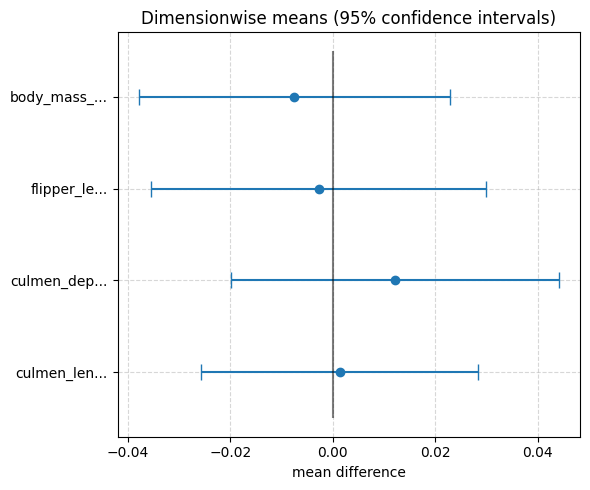

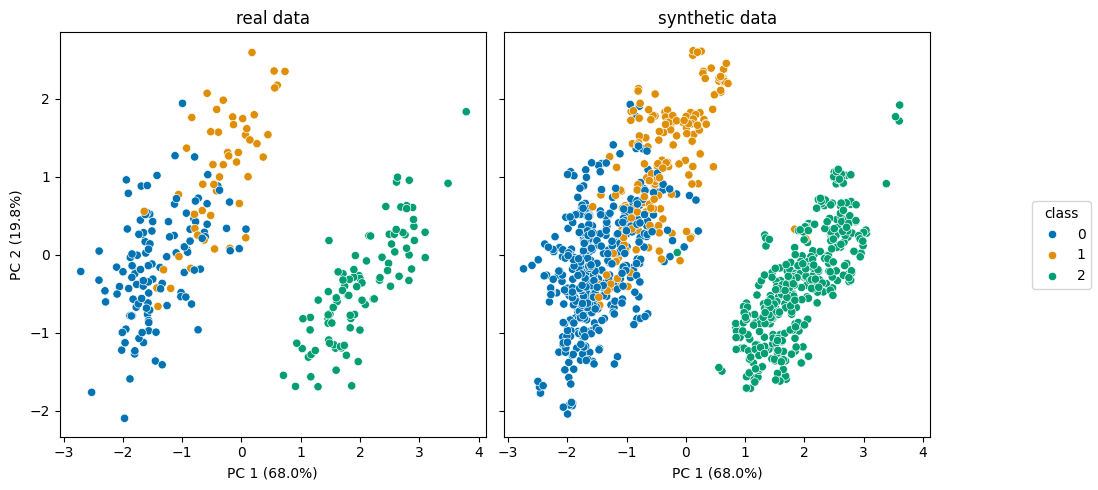

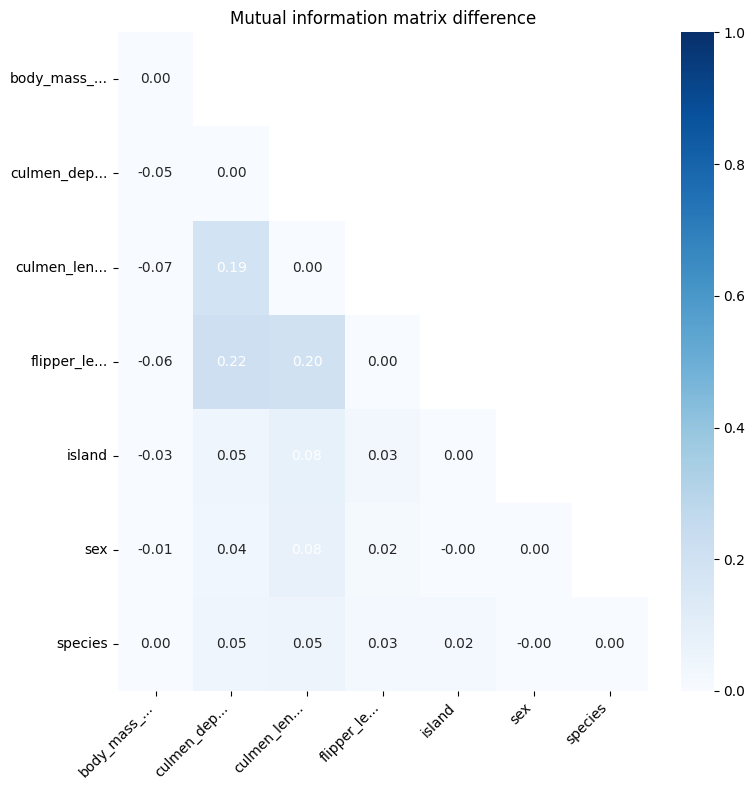

In [14]:
### First SynthEval object is created then run with the "full_eval" presets file.
S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")   # The _ is for Jupyter purposes only, to avoid printing the results dictionary as well.

In the next example we try to show the full extend of the flexibility of SynthEval. The evaluator has both one of the preset files, as well as additional metrics supplied. Note that the "ks_test" is already part of the "fast_eval" preset file, but feeding as an additional keyword argument overrides the preset option configuration. To save custom configurations, for easy reproduceability, when keyword arguments are supplied, a SE_config.json file is saved. Instead of calling one of the presets, a filepath to a SE_config.json file can also be fed.

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/17 [00:00<?, ?it/s]

Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:03<00:01,  3.68it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:06<00:00,  2.72it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0059  0.0078   |
| PCA difference in eigenvalues (exp. var.):   0.0025           |
| PCA angle between eigenvectors (radians) :   0.0065           |
| Average confidence interval overlap      :   0.6825  0.0630   |
|   -> # non-overlapping COIs at 95%       :    0               |
|   -> fraction of non-overlapping CIs     :   0.0000           |
| Mixed correlation matrix difference      :   0.1046           |
| Pairwise mutual information difference   :   0.5585           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0313  0.0033   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0368  0.0036   |
|       -> avg. Total Variation Distance   :   0.0239  0.0021   |
|   -> average combined p-val

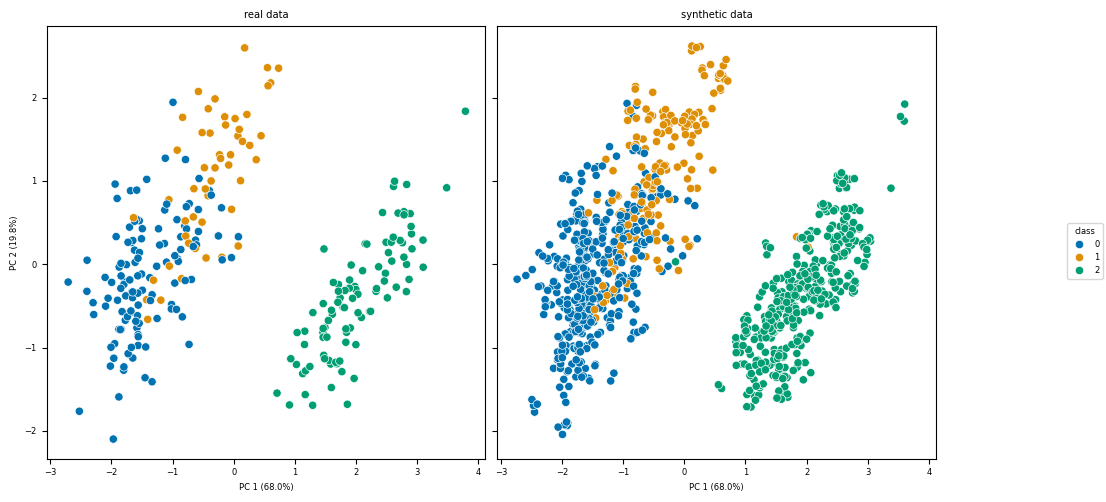

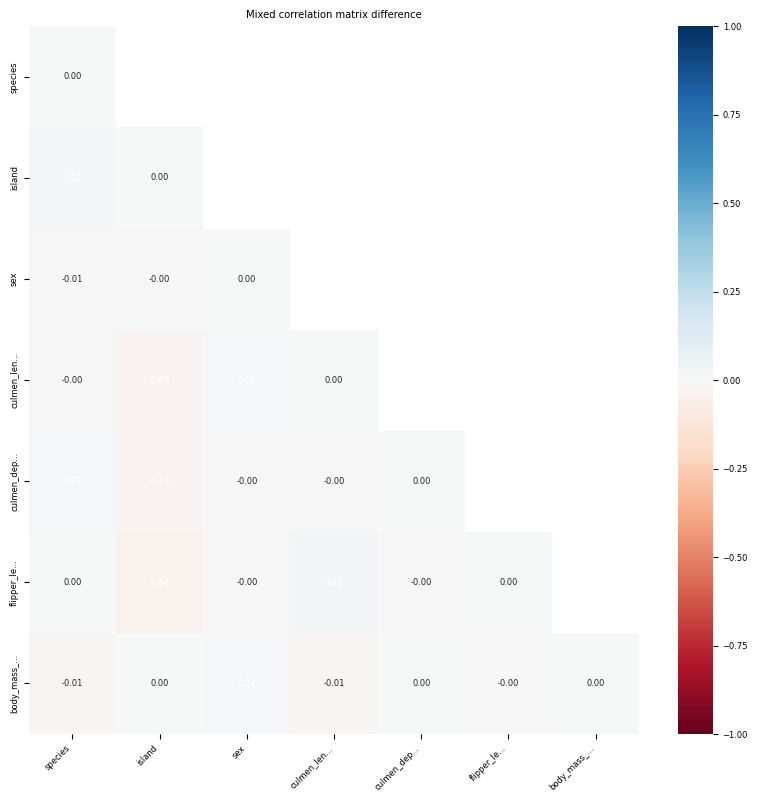

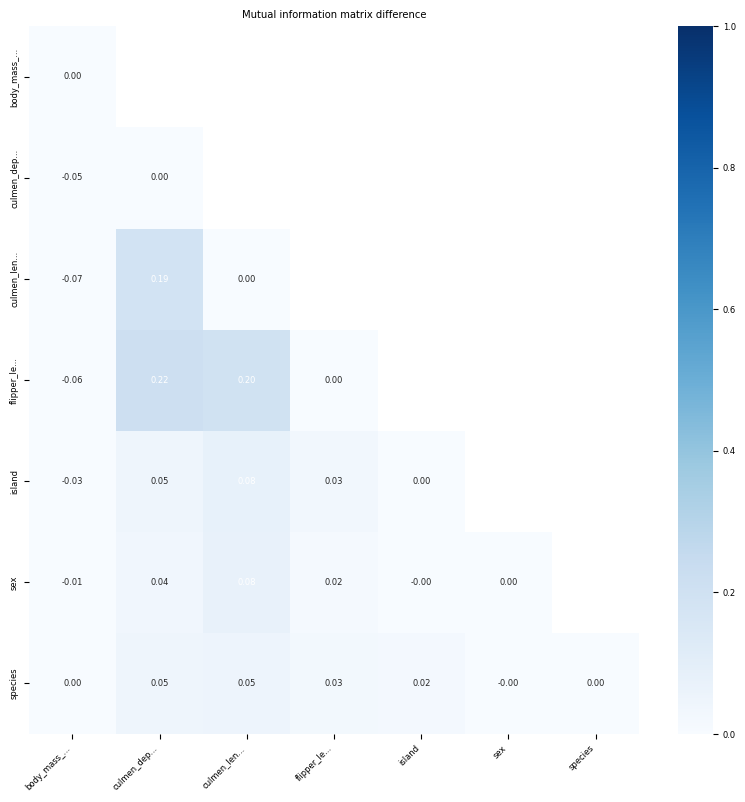

In [33]:
S = SynthEval(df_real,holdout_dataframe=df_test,nn_distance='euclid',unique_threshold=5)
_ = S.evaluate(df_fake,target_column,presets_file="full_eval")

In [24]:
#SynthEval test 2
import pandas as pd

from syntheval import SynthEval

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

### Testing data is not required, but the usability analysis will be more complete if it is included. 
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_test.csv")

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/17 [00:00<?, ?it/s]

Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:04<00:03,  2.06it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:05<00:00,  3.24it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.1023  0.0078   |
| PCA difference in eigenvalues (exp. var.):   0.1008           |
| PCA angle between eigenvectors (radians) :   0.0816           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.7940           |
| Pairwise mutual information difference   :   0.6490           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.2305  0.0354   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2627  0.0536   |
|       -> avg. Total Variation Distance   :   0.1876  0.0375   |
|   -> average combined p-val

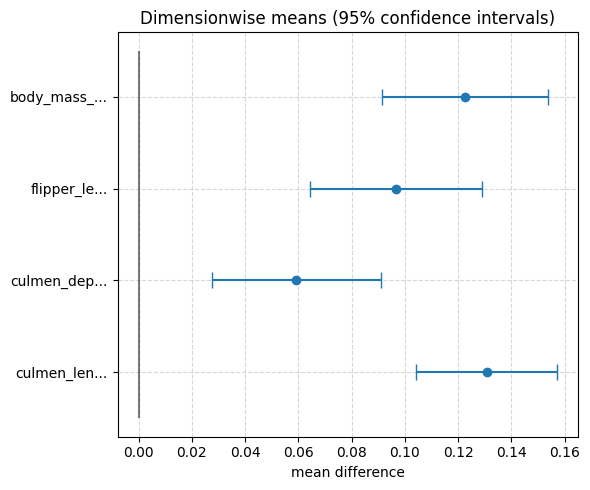

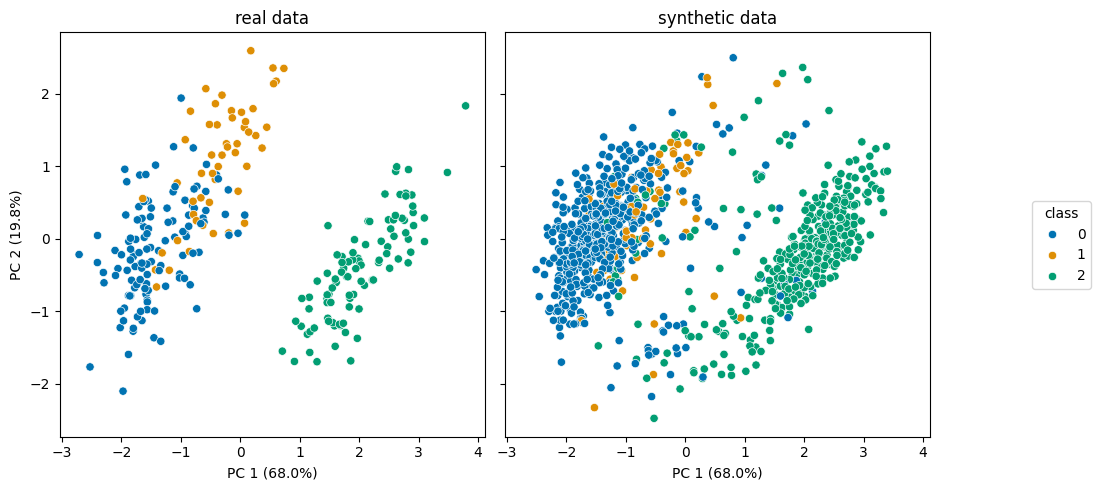

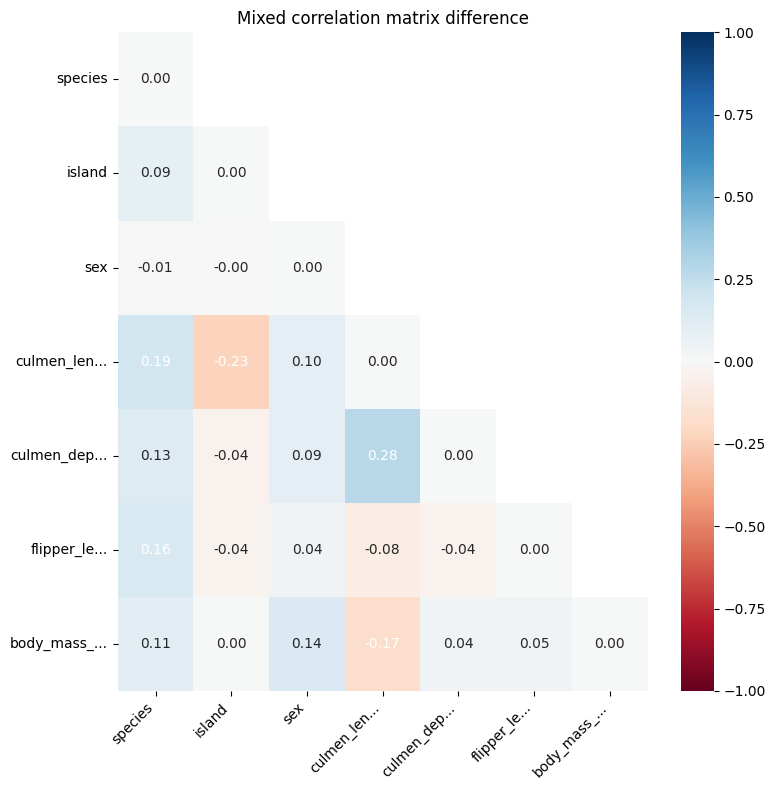

In [25]:
S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")

In [12]:
#SynthPop test
from synthesizers import Load
Load("mstz/breast").Split(size=0.8).Train(train_adapter="synthpop").Generate(count=1000).Evaluate(target_col="is_cancer").Save(name="breast_pop.xlsx", key="synth")

AttributeError: 'Series' object has no attribute 'iteritems'

In [3]:
#SynthCity test
from synthesizers import Load
Load("mstz/breast").Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=10000).Evaluate(target_col="is_cancer").Save(name="breast_city.xlsx", key="synth")

 57%|█████▋    | 1149/2000 [03:54<02:53,  4.90it/s]


[{'train':      clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  8                        4                         4   
1                 10                        8                         8   
2                  5                        1                         1   
3                  3                        1                         1   
4                  9                        9                        10   
..               ...                      ...                       ...   
541                3                       10                         8   
542                2                        1                         1   
543                2                        1                         1   
544                3                        1                         1   
545                3                        1                         1   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                   

In [5]:
#SynthCity ctgan generation test with multiple counts
from synthesizers import Load
for count in (100, 1000, 10000):
    Load("mstz/breast").Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=count).Evaluate(target_col="is_cancer").Save(name=f"breast_city_ctgan-{count}.xlsx", key="synth")

  3%|▎         | 55/2000 [00:12<07:37,  4.25it/s]


RuntimeError: NaNs detected in the discriminator loss

In [6]:
#SynthCity test 100
from synthesizers import Load
Load("mstz/breast").Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=100).Evaluate(target_col="is_cancer").Save(name="breast_city_100.xlsx", key="synth")

 30%|██▉       | 599/2000 [02:30<05:51,  3.99it/s]


[{'train':      clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  1                        1                         1   
1                  3                        2                         2   
2                  2                        1                         1   
3                  3                        1                         1   
4                  8                       10                         8   
..               ...                      ...                       ...   
541                1                        1                         1   
542                8                        7                         8   
543                1                        1                         1   
544               10                        4                         3   
545                4                        8                         6   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                   

In [10]:
#SynthCity test 1000
from synthesizers import Load
Load("mstz/breast").Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Evaluate(target_col="is_cancer").Save(name="breast_city_1000.xlsx", key="synth")

 47%|████▋     | 949/2000 [03:57<04:23,  3.99it/s]


[{'train':      clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  1                        1                         1   
1                  3                        2                         2   
2                  2                        1                         1   
3                  3                        1                         1   
4                  8                       10                         8   
..               ...                      ...                       ...   
541                1                        1                         1   
542                8                        7                         8   
543                1                        1                         1   
544               10                        4                         3   
545                4                        8                         6   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                   

In [11]:
#SynthCity test 10000
from synthesizers import Load
Load("mstz/breast").Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=10000).Evaluate(target_col="is_cancer").Save(name="breast_city_10000.xlsx", key="synth")

 55%|█████▍    | 1099/2000 [08:51<07:16,  2.07it/s]


[{'train':      clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  1                        1                         1   
1                  8                        4                         7   
2                 10                        3                         3   
3                  4                        3                         3   
4                  5                        1                         1   
..               ...                      ...                       ...   
541                3                        1                         1   
542                4                        1                         1   
543                1                        1                         1   
544               10                        4                         4   
545                2                        1                         1   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                   

Time to look at generating and evaluating synthetic penguin data


Generate using different models, different sizes of synth data, train_test_split, evaluate...

In [122]:
#Generating multiple synthetic datasets of penguin data using Synthesizers

#First we load the penguin data

import pandas as pd

from syntheval import SynthEval
from synthesizers import Load

df_penguins = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

#Remove any rows containg NaN
df_penguins = df_penguins.dropna()

In [14]:
#Generation test with penguin data

Load(df_penguins).Synthesize(split_size=0.8, gen_count=1000, eval_target_col="species", save_name="penguins.csv", save_key="synth")

  9%|▉         | 949/10000 [02:13<21:12,  7.11it/s]  


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Adelie  Torgersen              36.2             17.2   
1       Gentoo     Biscoe              44.5             14.7   
2       Gentoo     Biscoe              50.7             15.0   
3       Adelie  Torgersen              41.8             19.4   
4       Gentoo     Biscoe              50.5             15.2   
..         ...        ...               ...              ...   
262     Gentoo     Biscoe              49.4             15.8   
263     Gentoo     Biscoe              49.0             16.1   
264     Gentoo     Biscoe              49.3             15.7   
265     Adelie     Biscoe              37.9             18.6   
266  Chinstrap      Dream              51.0             18.8   

     flipper_length_mm  body_mass_g     sex  
0                187.0       3150.0  FEMALE  
1                214.0       4850.0  FEMALE  
2                223.0       5550.0    MALE  
3                198.0       4450.0 

In [126]:
#SynthCity test 1000
from synthesizers import Load
Load(df_penguins).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Evaluate(target_col="species").Save(name="penguin_city_1000.csv", key="synth")

 25%|██▍       | 499/2000 [00:49<02:28, 10.08it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Adelie      Dream              40.8             18.4   
1       Gentoo     Biscoe              46.5             14.5   
2       Gentoo     Biscoe              48.1             15.1   
3       Adelie      Dream              36.0             17.8   
4       Adelie  Torgersen              43.1             19.2   
..         ...        ...               ...              ...   
262     Adelie  Torgersen              34.6             21.1   
263     Adelie     Biscoe              35.3             18.9   
264     Gentoo     Biscoe              47.5             14.0   
265     Adelie     Biscoe              35.9             19.2   
266  Chinstrap      Dream              52.0             19.0   

     flipper_length_mm  body_mass_g     sex  
0                195.0       3900.0    MALE  
1                213.0       4400.0  FEMALE  
2                209.0       5500.0    MALE  
3                195.0       3450.0 

In [17]:
#SynthEval test penguin data 1

import pandas as pd

from syntheval import SynthEval

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:10<00:07,  1.13s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:11<00:01,  1.63it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:14<00:00,  1.19it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0496  0.0077   |
| PCA difference in eigenvalues (exp. var.):   0.1355           |
| PCA angle between eigenvectors (radians) :   0.1398           |
| Average confidence interval overlap      :   0.0551  0.0551   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   0.9401           |
| Pairwise mutual information difference   :   0.6613           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1252  0.0205   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1423  0.0203   |
|       -> avg. Total Variation Distance   :   0.1023  0.0407   |
|   -> average combined p-val

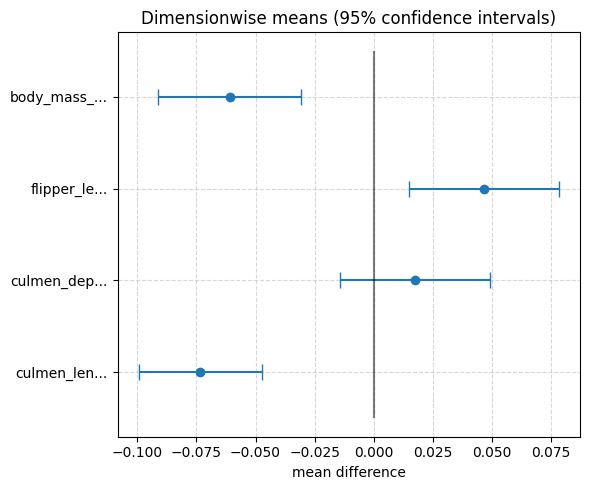

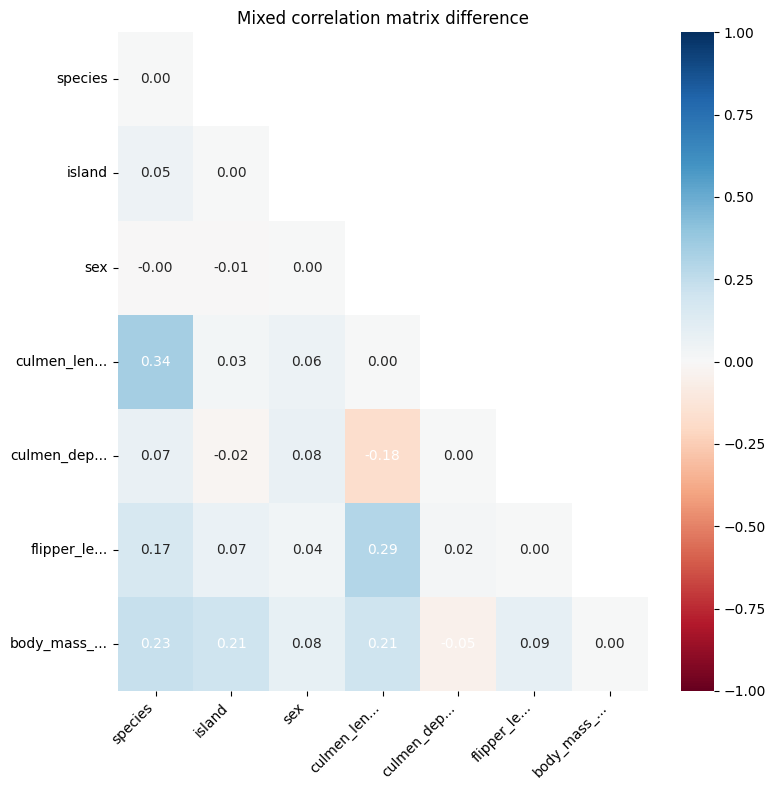

In [18]:
#Eval test with "full_eval" presets

S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")

In [1]:
#SynthEval test penguin data 2 (SynthCity gen)

import pandas as pd

from syntheval import SynthEval

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguin_city_1000.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  65%|██████▍   | 11/17 [00:08<00:04,  1.25it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:09<00:01,  1.76it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0830  0.0077   |
| PCA difference in eigenvalues (exp. var.):   0.0258           |
| PCA angle between eigenvectors (radians) :   0.0174           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.5752           |
| Pairwise mutual information difference   :   0.6577           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1875  0.0250   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2196  0.0177   |
|       -> avg. Total Variation Distance   :   0.1447  0.0462   |
|   -> average combined p-val

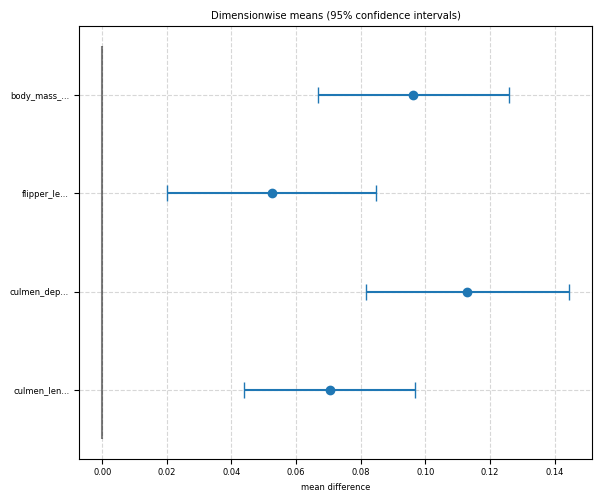

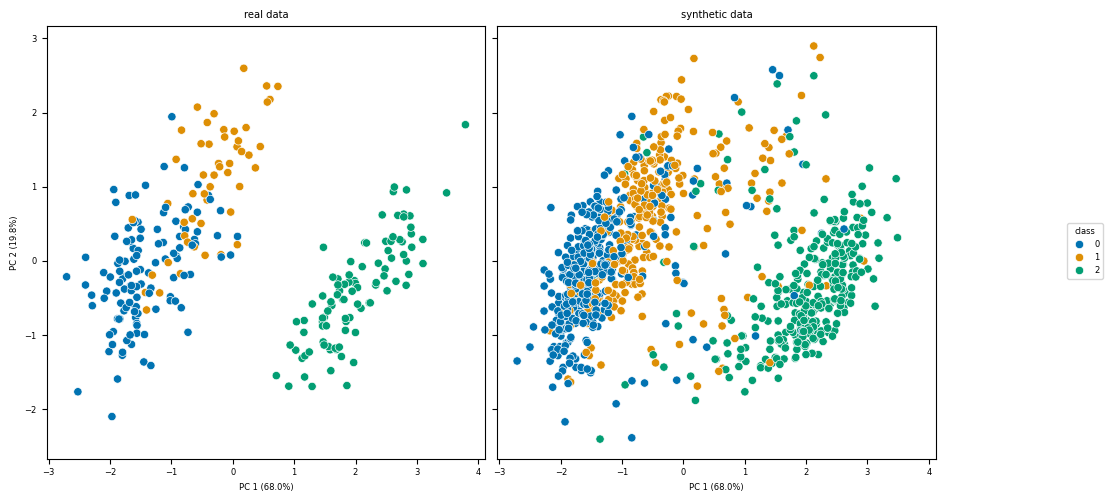

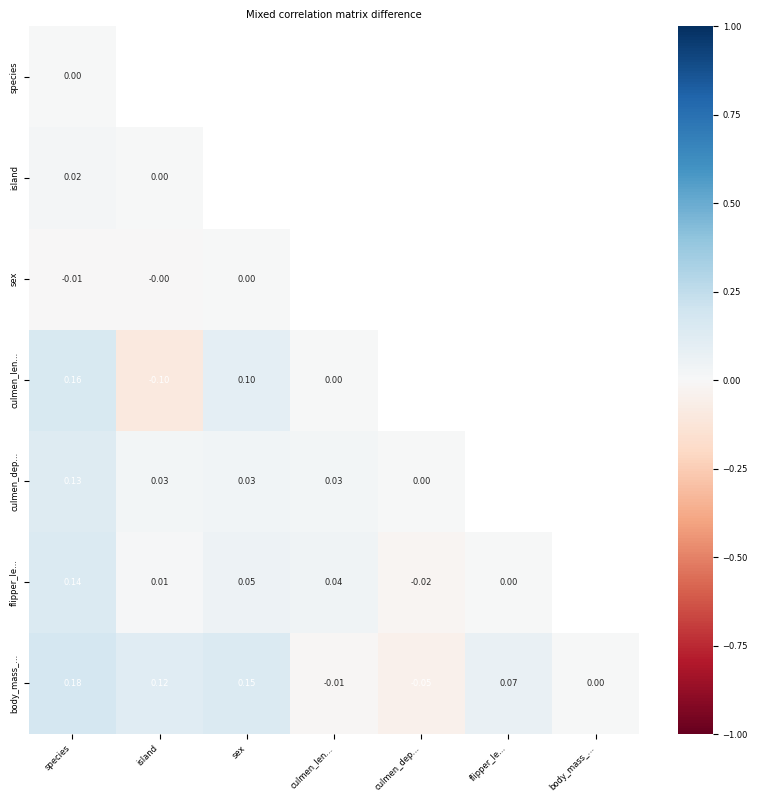

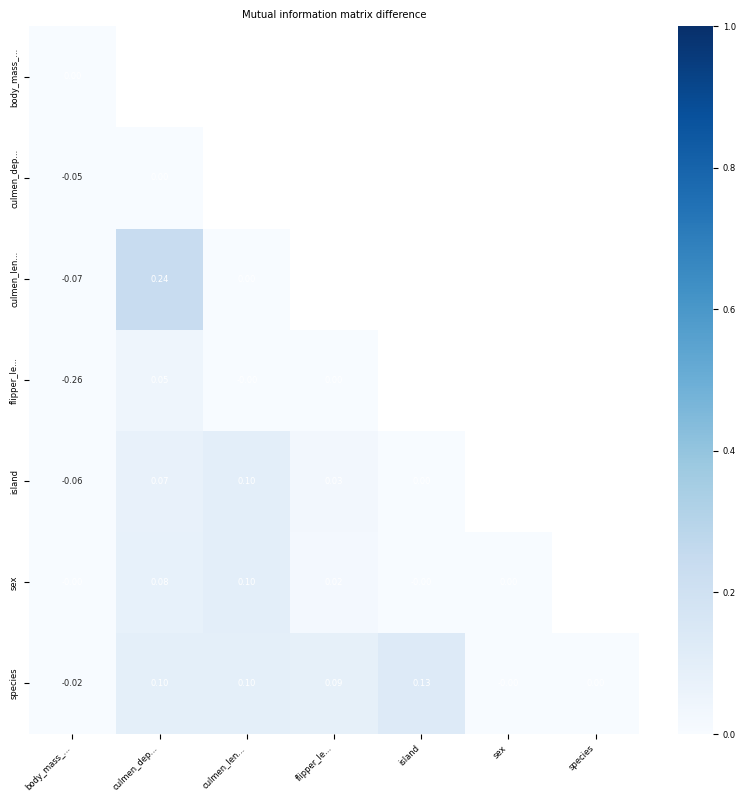

In [22]:
#Eval test with "full_eval" presets

S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")

In [25]:
#Now we really test to generate multiple synthetic datasets of penguin data using Synthesizers

from synthesizers import Load

for count in (100, 1000, 10000):
    Load(df_penguins).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=count).Save(name=f"penguin_city_ctgan-{count}.csv", key="synth")


 47%|████▋     | 949/2000 [01:41<01:52,  9.33it/s]


In [2]:
#SynthEval testing with multiple generated datasets from previous chunck

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake_100 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguin_city_ctgan-100.csv").round(1) # be sure to round to an appropriate number of decimals
df_fake_1000 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguin_city_ctgan-1000.csv").round(1) # be sure to round to an appropriate number of decimals
df_fake_10000 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguin_city_ctgan-10000.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake_100 = df_fake_100.iloc[:, 1:]
df_fake_1000 = df_fake_1000.iloc[:, 1:]
df_fake_10000 = df_fake_10000.iloc[:, 1:]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:03<00:02,  3.16it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:03<00:00,  4.54it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0661  0.0120   |
| PCA difference in eigenvalues (exp. var.):   0.1059           |
| PCA angle between eigenvectors (radians) :   0.0384           |
| Average confidence interval overlap      :   0.0212  0.0212   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   0.6888           |
| Pairwise mutual information difference   :   0.9502           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1915  0.0289   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2250  0.0427   |
|       -> avg. Total Variation Distance   :   0.1468  0.0208   |
|   -> average combined p-val

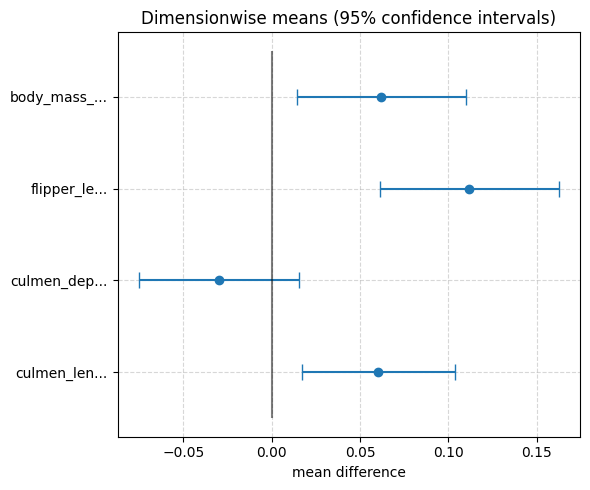

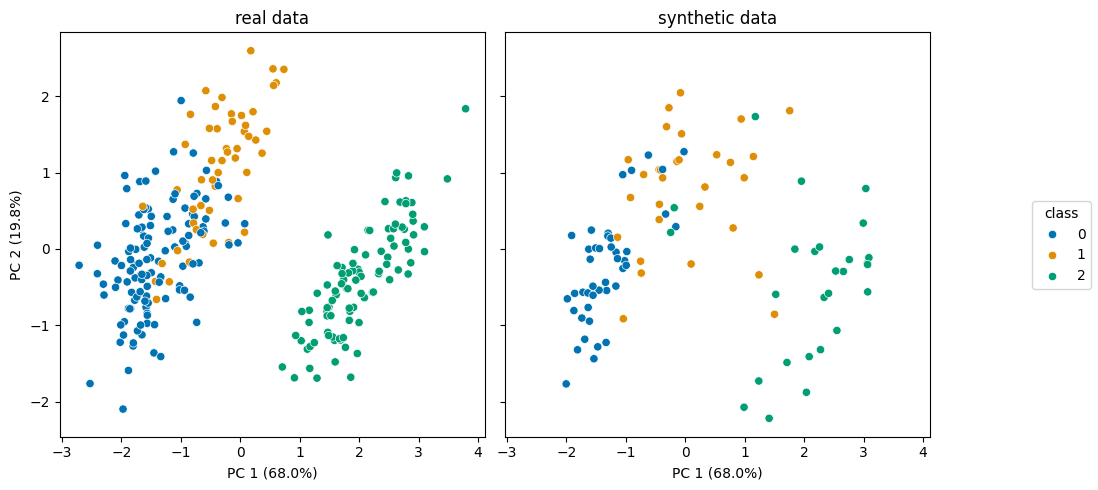

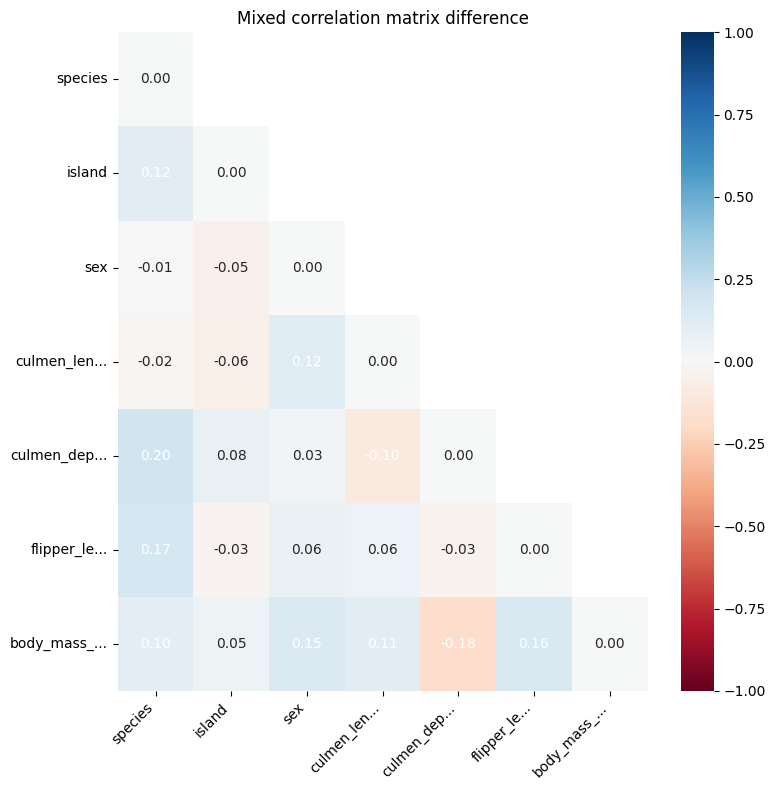

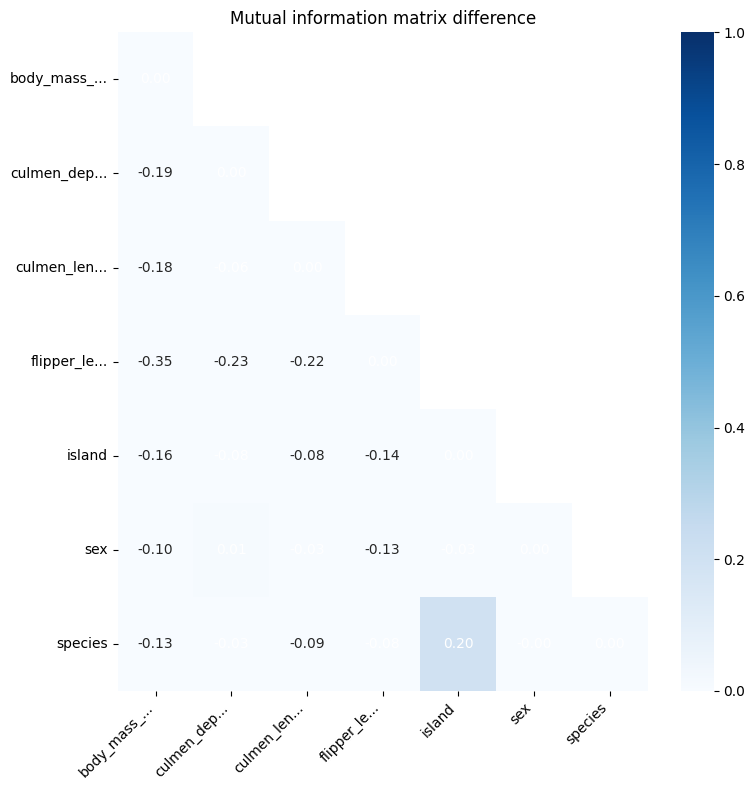

In [3]:
#Eval test with "full_eval" presets for penguin size 100

S = SynthEval(df_real)
_ = S.evaluate(df_fake_100,target_column,"full_eval")

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/17 [00:00<?, ?it/s]

Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:04<00:03,  2.15it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:05<00:00,  3.34it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0232  0.0076   |
| PCA difference in eigenvalues (exp. var.):   0.0236           |
| PCA angle between eigenvectors (radians) :   0.1088           |
| Average confidence interval overlap      :   0.3135  0.1520   |
|   -> # non-overlapping COIs at 95%       :    1               |
|   -> fraction of non-overlapping CIs     :   0.2500           |
| Mixed correlation matrix difference      :   0.7975           |
| Pairwise mutual information difference   :   0.7396           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1060  0.0156   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1198  0.0117   |
|       -> avg. Total Variation Distance   :   0.0877  0.0336   |
|   -> average combined p-val

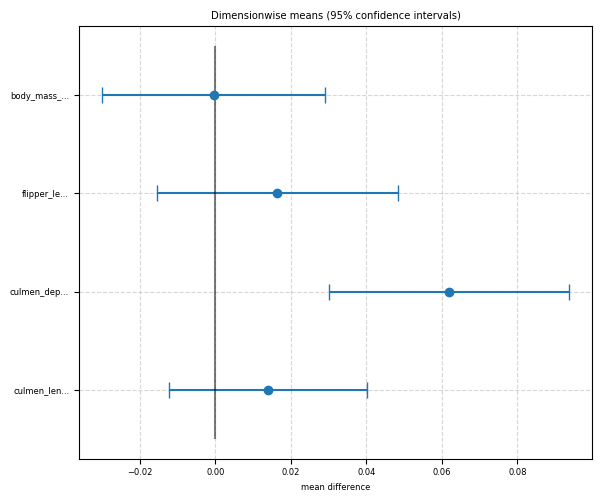

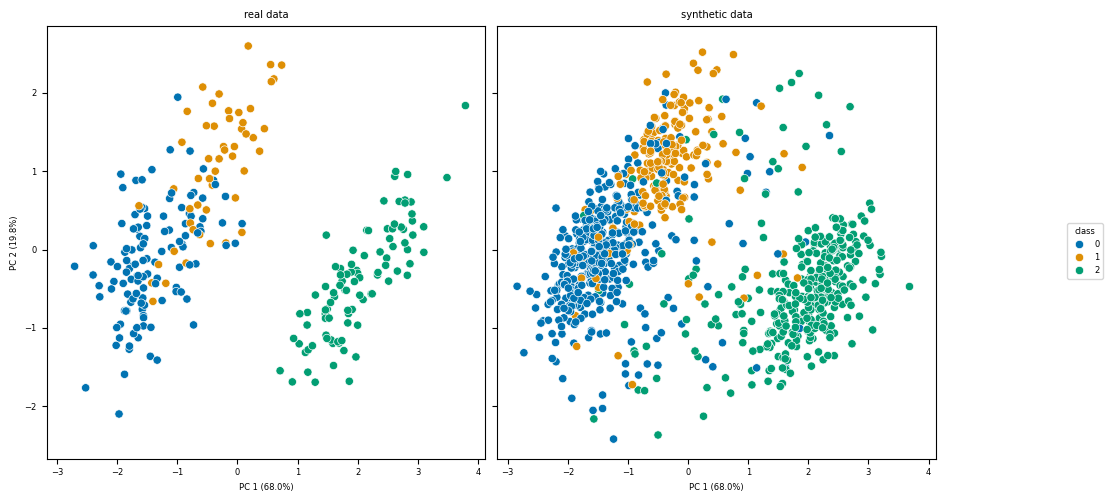

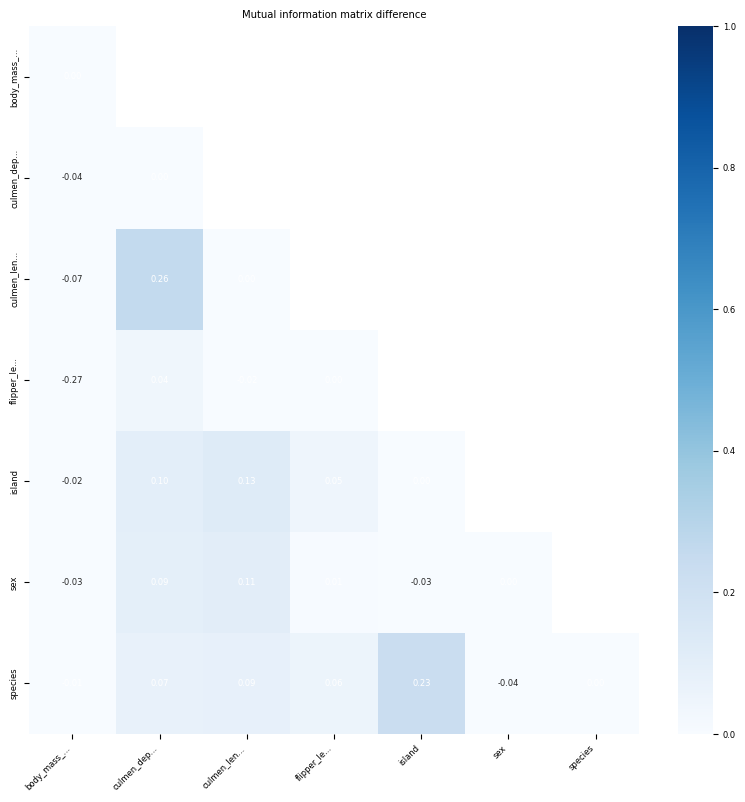

In [4]:
#Eval test with "full_eval" presets for penguin size 1000

S = SynthEval(df_real)
_ = S.evaluate(df_fake_1000,target_column,"full_eval")

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:18<00:14,  2.03s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  88%|████████▊ | 15/17 [00:21<00:01,  1.10it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:38<00:00,  2.29s/it]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0366  0.0070   |
| PCA difference in eigenvalues (exp. var.):   0.0529           |
| PCA angle between eigenvectors (radians) :   0.0424           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.6056           |
| Pairwise mutual information difference   :   1.1937           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0904  0.0235   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1270  0.0288   |
|       -> avg. Total Variation Distance   :   0.0414  0.0107   |
|   -> average combined p-val

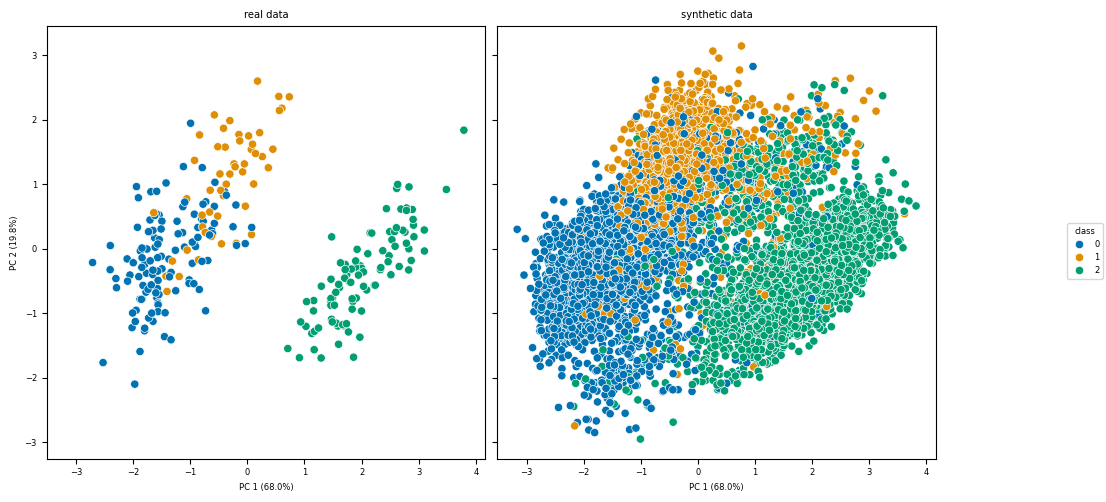

In [30]:
#Eval test with "full_eval" presets for penguin size 10000

S = SynthEval(df_real)
_ = S.evaluate(df_fake_10000,target_column,"full_eval")

In [37]:
#SynthCity test 500
from synthesizers import Load
Load(df_penguins).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=500).Evaluate(target_col="species").Save(name="penguin_city_500.csv", key="synth")

 22%|██▏       | 449/2000 [00:49<02:49,  9.12it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0       Gentoo  Biscoe              50.5             15.9              222.0   
1       Gentoo  Biscoe              48.6             16.0              230.0   
2       Adelie  Biscoe              37.7             18.7              180.0   
3       Adelie  Biscoe              37.9             18.6              172.0   
4       Gentoo  Biscoe              46.8             14.3              215.0   
..         ...     ...               ...              ...                ...   
262     Adelie   Dream              39.5             16.7              178.0   
263     Gentoo  Biscoe              49.1             15.0              228.0   
264     Adelie   Dream              41.1             17.5              190.0   
265  Chinstrap   Dream              42.4             17.3              181.0   
266  Chinstrap   Dream              46.4             18.6              190.0   

     body_mass_g     sex  
0

In [5]:
df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake_500 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguin_city_500.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake_500 = df_fake_500.iloc[:, 1:]


S = SynthEval(df_real, verbose=0)
res = S.evaluate(df_fake_500,target_column,"full_eval")

res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: Membership inference attack metric did not run, holdout data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.059294  0.008378  0.940706  0.008378
1    pca_eigval_diff   u  0.144514       NaN  0.855486       NaN
2     pca_eigvec_ang   u  0.097739       NaN  0.968889       NaN
3            avg_cio   u  0.170851  0.170851  0.170851  0.170851
4      corr_mat_diff   u  1.102765       NaN  0.947487       NaN
5    mutual_inf_diff   u  0.665394       NaN  0.968315       NaN
6        ks_tvd_stat   u  0.175322  0.025593  0.824678  0.025593
7       frac_ks_sigs   u  0.857143       NaN  0.142857       NaN
8         avg_h_dist   u  0.401634  0.075501  0.598366  0.075501
9           avg_pMSE   u  0.041485  0.001633  0.834059  0.006531
10          avg_nndr   p  0.813104  0.010480  0.813104  0.010480
11              nnaa   u  0.794787  0.000000  0.205213  0.000000
12       cls_F1_diff   u  0.076153  0.021245  0.923847  0.021245
13        median_DCR   p  2.015845       NaN  0.965130       NaN
14          hit_rate   p  0.014981       NaN  0.985019       NaN
15  eps_identif_risk   p  0.258427       NaN  0.741573       NaN
16    att_discl_risk   p  0.443553  0.123522  0.556447  0.123522

# New segment testing on heart_disease dataset.

In [4]:
#SynthCity ctgan hearts test

import pandas as pd

from syntheval import SynthEval
from synthesizers import Load

df_hearts = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\heart_disease\hearts_data.csv")

#Remove any rows containg NaN
df_hearts = df_hearts.dropna()

Load(df_hearts).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Evaluate(target_col="target").Save(name="hearts_ctgan_1000.csv", key="synth")

 35%|███▍      | 699/2000 [04:23<08:10,  2.65it/s]


[{'train':      age  sex  chest pain type  resting bp s  cholesterol  \
0     46    1                4           120          231   
1     43    0                2           120          249   
2     54    1                4           120          188   
3     49    0                2           134          271   
4     62    1                4           152          153   
..   ...  ...              ...           ...          ...   
947   40    1                2           130          275   
948   37    0                3           120          215   
949   65    1                4           134            0   
950   62    1                3           130          231   
951   47    1                4           112          204   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                      0            0             115                1   
1                      0            1             176                0   
2                      0          

In [3]:
#SynthEval test hearts data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\heart_disease\hearts_data.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_1000.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real, verbose=0)
res = S.evaluate(df_fake,target_column,"full_eval")

res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: Membership inference attack metric did not run, holdout data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.029732  0.002810  0.970268  0.002810
1    pca_eigval_diff   u  0.023888       NaN  0.976112       NaN
2     pca_eigvec_ang   u  3.022228       NaN  0.037995       NaN
3            avg_cio   u  0.000000  0.000000  0.000000  0.000000
4      corr_mat_diff   u  0.333554       NaN  0.994946       NaN
5    mutual_inf_diff   u  0.256339       NaN  0.996116       NaN
6        ks_tvd_stat   u  0.084310  0.016919  0.915690  0.016919
7       frac_ks_sigs   u  0.666667       NaN  0.333333       NaN
8         avg_h_dist   u  0.213333  0.025022  0.786667  0.025022
9           avg_pMSE   u  0.013552  0.000458  0.945792  0.001831
10          avg_nndr   p  0.787453  0.005330  0.787453  0.005330
11              nnaa   u  0.887088  0.000000  0.112912  0.000000
12       cls_F1_diff   u  0.032500  0.018690  0.967500  0.018690
13        median_DCR   p  5.735574       NaN  0.999979       NaN
14          hit_rate   p  0.000000       NaN  1.000000       NaN
15  eps_identif_risk   p  0.026891       NaN  0.973109       NaN
16    att_discl_risk   p  0.470658  0.084456  0.529342  0.084456

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:11<00:07,  1.05s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  88%|████████▊ | 15/17 [00:15<00:01,  1.01it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:20<00:00,  1.23s/it]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0297  0.0028   |
| PCA difference in eigenvalues (exp. var.):   0.0239           |
| PCA angle between eigenvectors (radians) :   3.0222           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    5               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.3336           |
| Pairwise mutual information difference   :   0.2563           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0843  0.0169   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1406  0.0127   |
|       -> avg. Total Variation Distance   :   0.0441  0.0133   |
|   -> average combined p-val

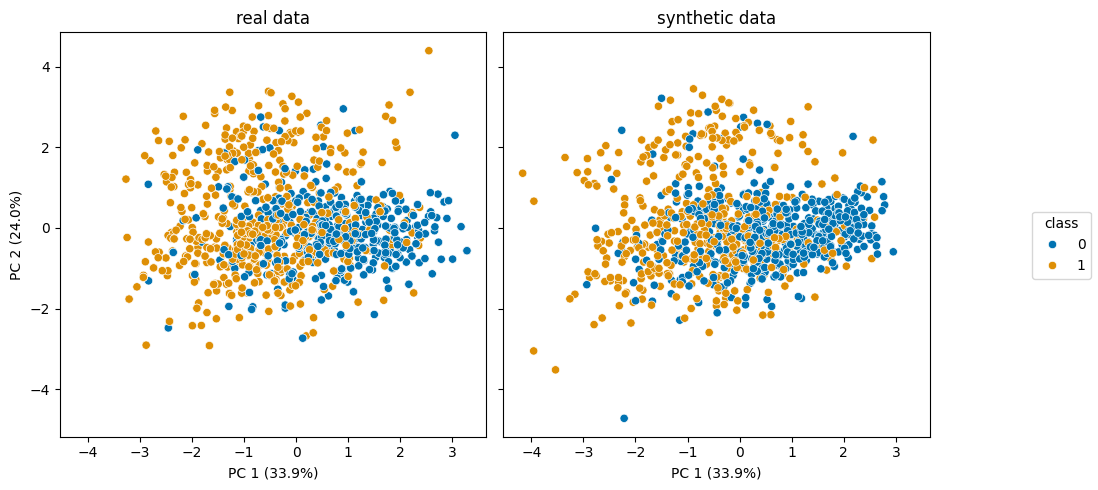

In [4]:
#SynthEval test hearts data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\heart_disease\hearts_data.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_1000.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")

# Checking out some train_test_split() stuff

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\heart_disease\hearts_data.csv")

X = df.iloc[:, :-1]  # Selecting all rows and all columns up to the final column "target"
y = df['target']  # Selecting the target column

In [8]:
#Making the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=0)

In [10]:
reg.predict(X_test[0:10])

array([0.88547486, 0.55421687, 0.07746479, 0.88547486, 0.88547486,
       0.88547486, 0.07746479, 0.46527778, 0.55421687, 0.07746479])

In [16]:
# Testing ML Classifiers on heart disease data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\heart_disease\hearts_data.csv")

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the name of the target column
y = df['target']

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your classifiers
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate the classifiers
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

f1_rf = f1_score(y_test, y_pred_rf)
f1_svc = f1_score(y_test, y_pred_svc)
f1_lr = f1_score(y_test, y_pred_lr)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier F1 Score:", f1_rf)

print("Support Vector Classifier Accuracy:", accuracy_svc)
print("Support Vector Classifier F1 Score:", f1_svc)

print("Logistic Regression Classifier Accuracy:", accuracy_lr)
print("Logistic Regression Classifier F1 Score:", f1_lr)


Random Forest Classifier Accuracy: 0.9411764705882353
Random Forest Classifier F1 Score: 0.9473684210526315
Support Vector Classifier Accuracy: 0.726890756302521
Support Vector Classifier F1 Score: 0.7389558232931727
Logistic Regression Classifier Accuracy: 0.8319327731092437
Logistic Regression Classifier F1 Score: 0.8484848484848484


In [14]:
# Saving the training and testing sets from heart_disease data to CSV files

from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\heart_disease\hearts_data.csv")

# Splitting the dataset into 80% training and 20% testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Saving the training set to a CSV file
train_df.to_csv('hearts_80_train.csv', index=False)

# Saving the testing set to a CSV file
test_df.to_csv('hearts_20_test.csv', index=False)

# Back to synthesizing heart_disease data

In [108]:
#SynthCity ctgan hearts on 80_train_data

import pandas as pd
from synthesizers import Load

df_hearts = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")

#Remove any rows containg NaN
df_hearts = df_hearts.dropna()

Load(df_hearts).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Evaluate(target_col="target").Save(name="temp_test_hearts_ctgan_on_trained_1000.csv", key="synth")

 14%|█▎        | 272/2000 [01:10<07:29,  3.84it/s]


RuntimeError: NaNs detected in the generator loss

# SynthEval on synthesized heart_data

In [19]:
#SynthEval hearts without test data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_on_trained_1000.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real, verbose=0)
res = S.evaluate(df_fake,target_column,"full_eval")

res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: Membership inference attack metric did not run, holdout data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.031650  0.003107  0.968350  0.003107
1    pca_eigval_diff   u  0.033738       NaN  0.966262       NaN
2     pca_eigvec_ang   u  0.086403       NaN  0.972497       NaN
3            avg_cio   u  0.084297  0.084297  0.084297  0.084297
4      corr_mat_diff   u  0.342349       NaN  0.994813       NaN
5    mutual_inf_diff   u  0.307368       NaN  0.995343       NaN
6        ks_tvd_stat   u  0.080456  0.019906  0.919544  0.019906
7       frac_ks_sigs   u  0.583333       NaN  0.416667       NaN
8         avg_h_dist   u  0.207130  0.032007  0.792870  0.032007
9           avg_pMSE   u  0.028679  0.000923  0.885284  0.003693
10          avg_nndr   p  0.766717  0.006269  0.766717  0.006269
11              nnaa   u  0.790790  0.000000  0.209210  0.000000
12       cls_F1_diff   u  0.079810  0.012379  0.920190  0.012379
13        median_DCR   p  2.951999       NaN  0.994558       NaN
14          hit_rate   p  0.000000       NaN  1.000000       NaN
15  eps_identif_risk   p  0.154412       NaN  0.845588       NaN
16    att_discl_risk   p  0.470238  0.085087  0.529762  0.085087

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:12<00:07,  1.09s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  88%|████████▊ | 15/17 [00:16<00:01,  1.05it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:22<00:00,  1.30s/it]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0316  0.0031   |
| PCA difference in eigenvalues (exp. var.):   0.0337           |
| PCA angle between eigenvectors (radians) :   0.0864           |
| Average confidence interval overlap      :   0.0843  0.0843   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   0.8000           |
| Mixed correlation matrix difference      :   0.3423           |
| Pairwise mutual information difference   :   0.3074           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0805  0.0199   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1486  0.0221   |
|       -> avg. Total Variation Distance   :   0.0318  0.0081   |
|   -> average combined p-val

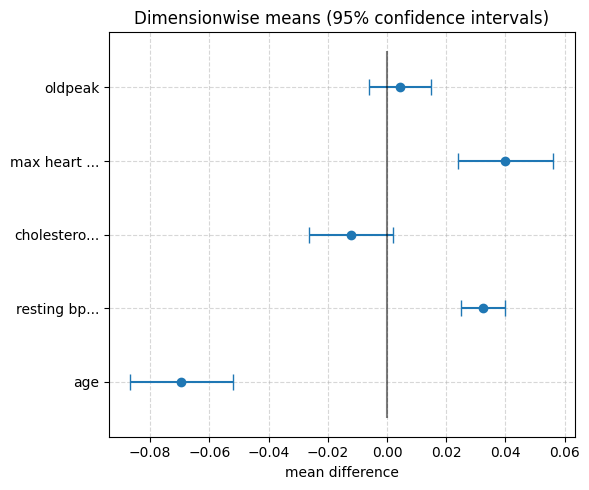

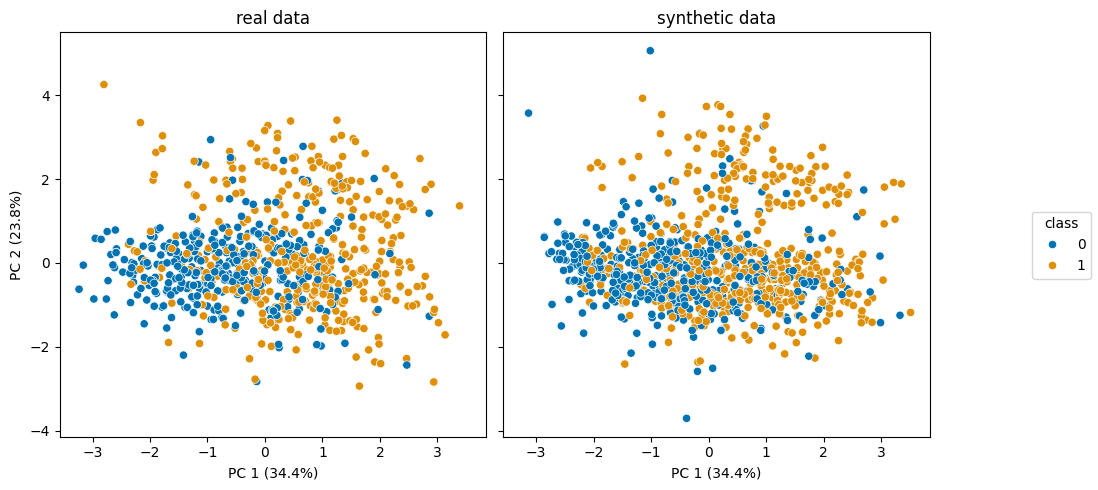

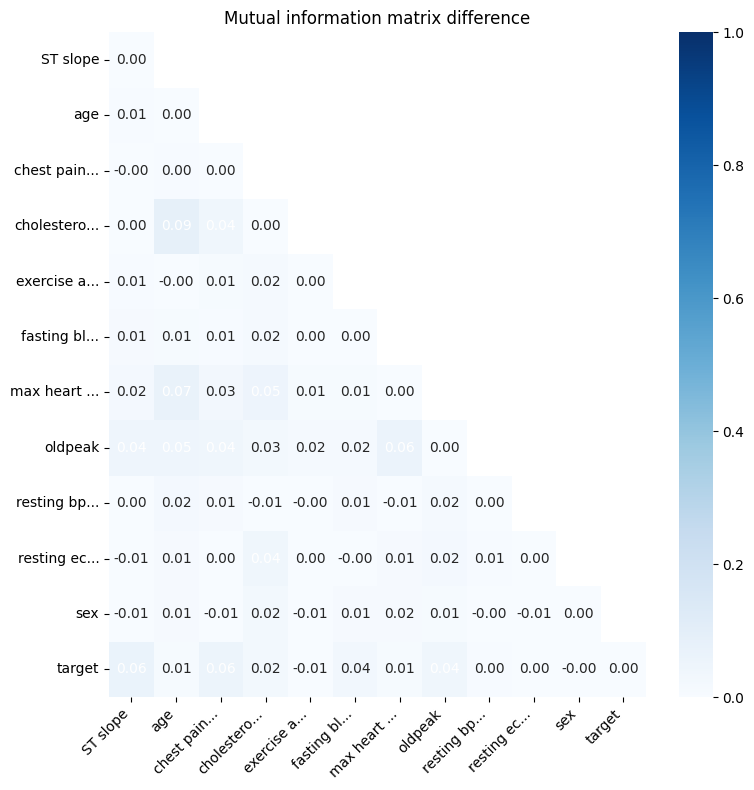

In [20]:
#SynthEval hearts without test data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_on_trained_1000.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")

In [21]:
#SynthEval hearts with test data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_on_trained_1000.csv").round(1) # be sure to round to an appropriate number of decimals
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_20_test.csv")

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real, holdout_dataframe=df_test, verbose=0)
res = S.evaluate(df_fake,target_column,"full_eval")

res

metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.031650  0.003107  0.968350  0.003107
1    pca_eigval_diff   u  0.033738       NaN  0.966262       NaN
2     pca_eigvec_ang   u  0.086403       NaN  0.972497       NaN
3            avg_cio   u  0.084297  0.084297  0.084297  0.084297
4      corr_mat_diff   u  0.342349       NaN  0.994813       NaN
5    mutual_inf_diff   u  0.307368       NaN  0.995343       NaN
6        ks_tvd_stat   u  0.080456  0.019906  0.919544  0.019906
7       frac_ks_sigs   u  0.500000       NaN  0.500000       NaN
8         avg_h_dist   u  0.207130  0.032007  0.792870  0.032007
9           avg_pMSE   u  0.028679  0.000923  0.885284  0.003693
10          avg_nndr   p  0.766717  0.006269  0.766717  0.006269
11    priv_loss_nndr   p  0.013620  0.012929  0.986380  0.006269
12              nnaa   u  0.790790  0.000000  0.209210  0.000000
13    priv_loss_nnaa   p -0.134067  0.004461  0.865933  0.004461
14             auroc   u  0.014013       NaN  0.985987       NaN
15       cls_F1_diff   u  0.079810  0.012379  0.920190  0.012379
16  cls_F1_diff_hout   u  0.045168  0.015942  0.954832  0.015942
17        median_DCR   p  2.951999       NaN  0.994558       NaN
18          hit_rate   p  0.000000       NaN  1.000000       NaN
19  eps_identif_risk   p  0.154412       NaN  0.845588       NaN
20      mia_cls_risk   p  0.971429  0.006827  0.028571  0.006827
21    att_discl_risk   p  0.467717  0.087426  0.532283  0.087426

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: att_discl: 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0316  0.0031   |
| PCA difference in eigenvalues (exp. var.):   0.0337           |
| PCA angle between eigenvectors (radians) :   0.0864           |
| Average confidence interval overlap      :   0.0843  0.0843   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   0.8000           |
| Mixed correlation matrix difference      :   0.3423           |
| Pairwise mutual information difference   :   0.3074           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0805  0.0199   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1486  0.0221   |
|       -> avg. Total Variation Distance   :   0.0318  0.0081   |
|   -> average combined p-val

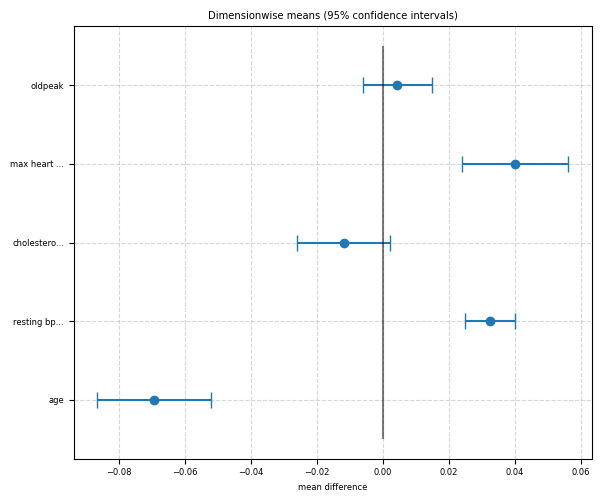

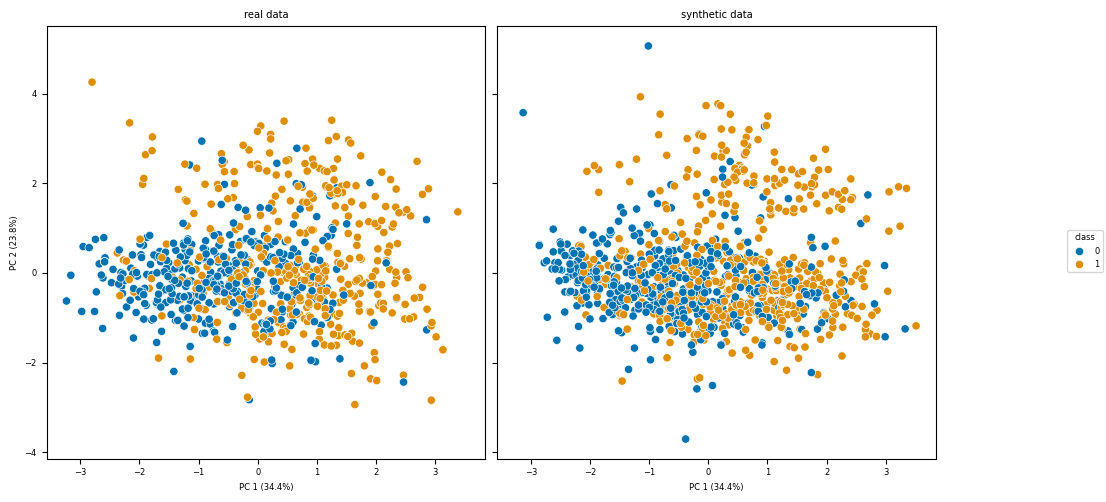

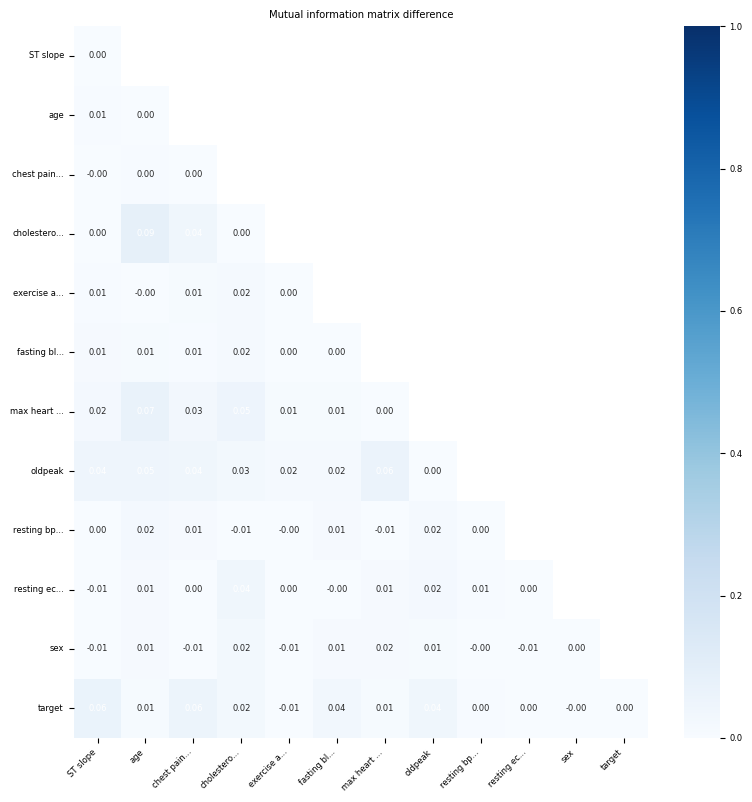

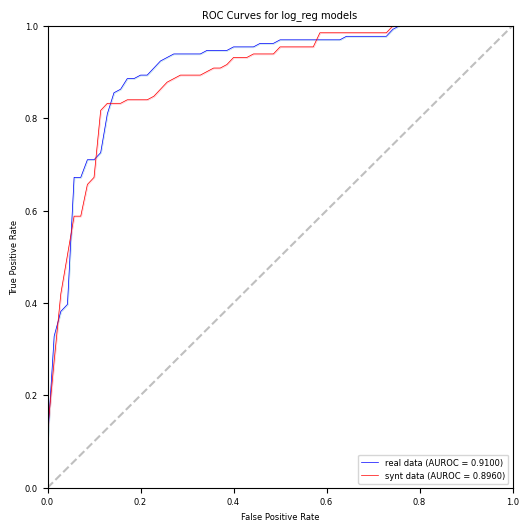

In [22]:
#SynthEval hearts with test data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_on_trained_1000.csv").round(1) # be sure to round to an appropriate number of decimals
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_20_test.csv")

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real, holdout_dataframe=df_test)
_ = S.evaluate(df_fake,target_column,"full_eval")

# Test stacking/augmenting on heart data

In [28]:
# Concatenate the DataFrames along the rows axis (assuming they have the same columns)
combined_df = pd.concat([df_real, df_fake], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('hearts_stacked_v1.csv', index=False)

In [49]:
# Saving the training and testing sets from heart_disease data to CSV files

from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_stacked_v1.csv")

# Splitting the dataset into 80% training and 20% testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Saving the training set to a CSV file
train_df.to_csv('hearts_stacked_v1_train.csv', index=False)

# Saving the testing set to a CSV file
test_df.to_csv('hearts_stacked_v1_test.csv', index=False)

In [56]:
df_stacked = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_stacked_v1.csv")
df_stacked = df_stacked.dropna()

# SynthCity ctgan on stacked data

Load(df_stacked).Split(size=0.5).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=2000).Evaluate(target_col='target').Save(name="hearts_syn_on_v1_count_2000.csv", key="synth")


 27%|██▋       | 549/2000 [04:03<10:43,  2.26it/s]


[{'train':      age  sex  chest pain type  resting bp s  cholesterol  \
0     48    0                2           120          177   
1     68    1                4           138          305   
2     43    1                4           150          247   
3     45    1                3           104          206   
4     62    0                4           150          244   
..   ...  ...              ...           ...          ...   
971   34    0                2           116          216   
972   62    1                2           131            0   
973   57    1                2           180          285   
974   60    1                2           128           22   
975   60    1                4           120            0   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                      1            1             148                0   
1                      0            1             109                1   
2                      0          

In [63]:
df_stacked = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_stacked_v1_train.csv")
df_stacked = df_stacked.dropna()

# SynthCity ctgan on stacked data

Load(df_stacked).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=2000).Save(name="hearts_syn_on_v1_count_2000.csv", key="synth")


  2%|▏         | 35/2000 [00:15<14:17,  2.29it/s]


RuntimeError: NaNs detected in the discriminator loss

# Trying to start over with synth gen and stacking

In [107]:
#SynthCity ctgan hearts on 80_train_data

import pandas as pd
from synthesizers import Load

#df_hearts = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\heart_disease\hearts_data.csv")
df_hearts = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")

#Remove any rows containg NaN
df_hearts = df_hearts.dropna()

Load(df_hearts).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Save(name="hearts_ctgan_on_trained_1000_v2.csv", key="synth")

 14%|█▎        | 272/2000 [01:13<07:49,  3.68it/s]


RuntimeError: NaNs detected in the generator loss

In [82]:
#SynthEval hearts with test data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_on_trained_1000_v2.csv").round(1) # be sure to round to an appropriate number of decimals
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_20_test.csv")

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real, holdout_dataframe=df_test, verbose=0)
res = S.evaluate(df_fake,target_column,"full_eval")

res

metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.023817  0.003110  0.976183  0.003110
1    pca_eigval_diff   u  0.028426       NaN  0.971574       NaN
2     pca_eigvec_ang   u  0.226512       NaN  0.927899       NaN
3            avg_cio   u  0.291577  0.179766  0.291577  0.179766
4      corr_mat_diff   u  0.356333       NaN  0.994601       NaN
5    mutual_inf_diff   u  0.288819       NaN  0.995624       NaN
6        ks_tvd_stat   u  0.068632  0.014718  0.931368  0.014718
7       frac_ks_sigs   u  0.666667       NaN  0.333333       NaN
8         avg_h_dist   u  0.207337  0.021980  0.792663  0.021980
9           avg_pMSE   u  0.021010  0.000813  0.915961  0.003254
10          avg_nndr   p  0.771492  0.006155  0.771492  0.006155
11    priv_loss_nndr   p  0.013014  0.012924  0.986986  0.006155
12              nnaa   u  0.794945  0.000000  0.205055  0.000000
13    priv_loss_nnaa   p -0.190113  0.005075  0.809887  0.005075
14             auroc   u  0.015540       NaN  0.984460       NaN
15       cls_F1_diff   u  0.077725  0.015448  0.922275  0.015448
16  cls_F1_diff_hout   u  0.064076  0.026815  0.935924  0.026815
17        median_DCR   p  3.135047       NaN  0.996223       NaN
18          hit_rate   p  0.000000       NaN  1.000000       NaN
19  eps_identif_risk   p  0.134454       NaN  0.865546       NaN
20      mia_cls_risk   p  0.836975  0.023709  0.163025  0.023709
21    att_discl_risk   p  0.471218  0.087939  0.528782  0.087939

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/17 [00:00<?, ?it/s]

Syntheval: att_discl: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0238  0.0031   |
| PCA difference in eigenvalues (exp. var.):   0.0284           |
| PCA angle between eigenvectors (radians) :   0.2265           |
| Average confidence interval overlap      :   0.2916  0.1798   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.6000           |
| Mixed correlation matrix difference      :   0.3563           |
| Pairwise mutual information difference   :   0.2888           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0686  0.0147   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1091  0.0251   |
|       -> avg. Total Variation Distance   :   0.0397  0.0068   |
|   -> average combined p-val

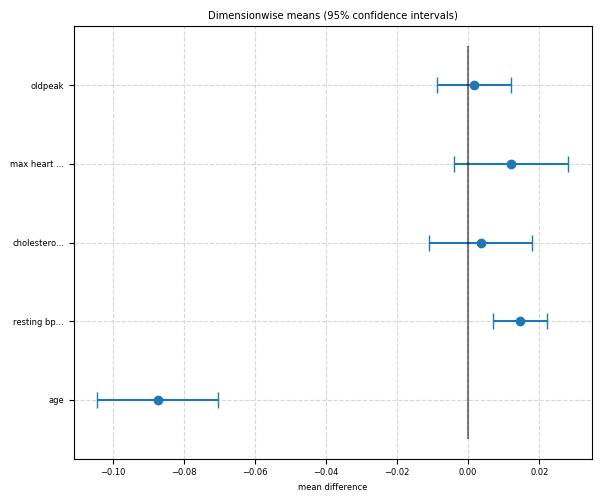

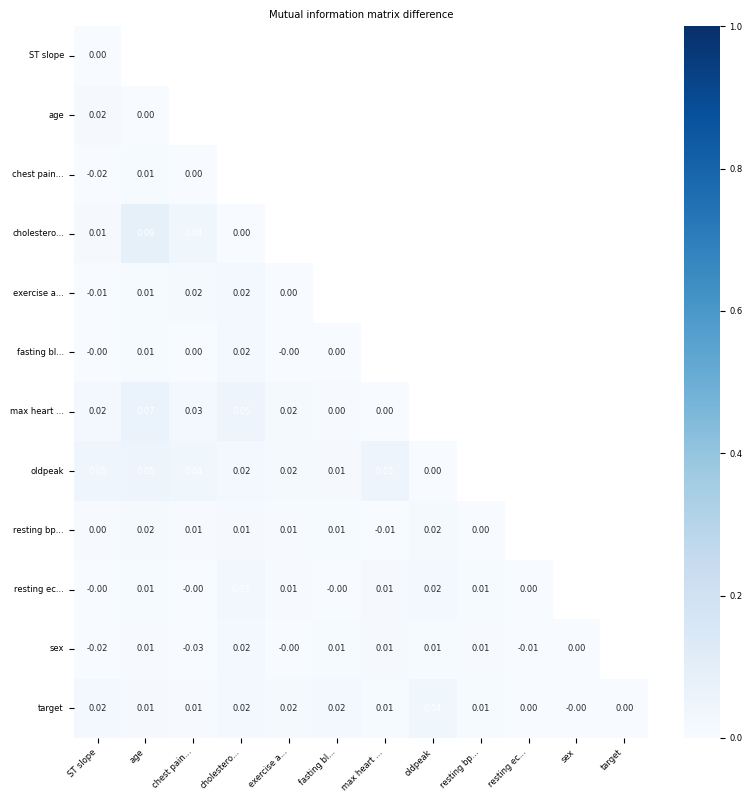

In [83]:
#SynthEval hearts with test data
import pandas as pd

from syntheval import SynthEval

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_80_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_ctgan_on_trained_1000_v2.csv").round(1) # be sure to round to an appropriate number of decimals
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_20_test.csv")

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

target_column = 'target'                           # column to use as target for classification metrics and coloration of PCA plot.

S = SynthEval(df_real, holdout_dataframe=df_test)
_ = S.evaluate(df_fake,target_column,"full_eval")

In [84]:
# Concatenate the DataFrames along the rows axis (assuming they have the same columns)
combined_df = pd.concat([df_real, df_fake], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('hearts_stacked_v1.csv', index=False)

In [89]:
train_average = df_real['oldpeak'].mean()
fake_average = df_fake['oldpeak'].mean()

#Print averages
print(train_average)
print(fake_average)


0.9054621848739496
0.8916


In [92]:
#Print the highest and lowest values of the oldpeak column in the real and fake data along with the index number
print(df_real['oldpeak'].idxmax())
print(df_real['oldpeak'].idxmin())
print(df_fake['oldpeak'].idxmax())
print(df_fake['oldpeak'].idxmin())
print(df_real['oldpeak'].max())
print(df_real['oldpeak'].min())
print(df_fake['oldpeak'].max())
print(df_fake['oldpeak'].min())

98
774
304
0
6.2
-2.6
4.1
-0.1


In [95]:
# Test synth gen on pure synth data

df_stacked = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_stacked_v1.csv")
df_stacked = df_stacked.dropna()

# SynthCity ctgan on stacked data

Load(df_fake).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Evaluate(target_col='target').Save(name="hearts_syn_on_stacked_v1.csv", key="synth")


 26%|██▌       | 517/2000 [02:20<06:44,  3.67it/s]


RuntimeError: NaNs detected in the generator loss

In [87]:
df_stacked = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\hearts_stacked_v1.csv")
df_stacked = df_stacked.dropna()

# SynthCity ctgan on stacked data

Load(df_stacked).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=2000).Evaluate(target_col='target').Save(name="hearts_syn_on_stacked_v1.csv", key="synth")


  2%|▏         | 44/2000 [00:19<14:16,  2.28it/s]


RuntimeError: NaNs detected in the generator loss

# Restart SDG using ctgan on penguin data
# Testing to see if issue is with training the model on heart_disease data, or the data itself is bad

In [127]:
import pandas as pd

from syntheval import SynthEval
from synthesizers import Load

df_penguins = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

#Remove any rows containg NaN
df_penguins = df_penguins.dropna()

#Make a 80/20 split
train_df, test_df = train_test_split(df_penguins, test_size=0.2, random_state=42)

# Saving the training set to a CSV file
train_df.to_csv('penguins_train.csv', index=False)

# Saving the testing set to a CSV file
test_df.to_csv('penguins_test.csv', index=False)


In [131]:
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")
penguins_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv")
#Count the number of rows in the penguins_train dataset
penguins_train.shape[0]

gen_count = penguins_train.shape[0]


In [129]:
#SynthCity ctgan penguins on penguin_train

Load(penguins_train).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_v1.csv", key="synth")


 25%|██▍       | 499/2000 [00:53<02:41,  9.30it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

In [130]:
#SynthEval penguins with test data
import pandas as pd

from syntheval import SynthEval

penguins_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_v1.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from fake
penguins_fake = penguins_fake.iloc[:, 1:]

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.



In [133]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res = S.evaluate(penguins_fake,target_column,"full_eval")

res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.044466  0.009494  0.955534  0.009494
1    pca_eigval_diff   u  0.048902       NaN  0.951098       NaN
2     pca_eigvec_ang   u  0.028423       NaN  0.990953       NaN
3            avg_cio   u  0.162608  0.162608  0.162608  0.162608
4      corr_mat_diff   u  0.573593       NaN  0.972686       NaN
5    mutual_inf_diff   u  0.722269       NaN  0.965606       NaN
6        ks_tvd_stat   u  0.134290  0.028296  0.865710  0.028296
7       frac_ks_sigs   u  0.571429       NaN  0.428571       NaN
8         avg_h_dist   u  0.335774  0.067684  0.664226  0.067684
9           avg_pMSE   u  0.028261  0.002978  0.886955  0.011910
10          avg_nndr   p  0.794112  0.009747  0.794112  0.009747
11    priv_loss_nndr   p  0.043955  0.019794  0.956045  0.009747
12              nnaa   u  0.627341  0.000000  0.372659  0.000000
13    priv_loss_nnaa   p -0.058933  0.008300  0.941067  0.008300
14       cls_F1_diff   u  0.085290  0.016464  0.914710  0.016464
15  cls_F1_diff_hout   u  0.149254  0.032242  0.850746  0.032242
16        median_DCR   p  1.280071       NaN  0.856504       NaN
17          hit_rate   p  0.029963       NaN  0.970037       NaN
18  eps_identif_risk   p  0.280899       NaN  0.719101       NaN
19      mia_cls_risk   p  0.900000  0.030281  0.100000  0.030281
20    att_discl_risk   p  0.443114  0.115480  0.556886  0.115480

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:02<00:01,  3.78it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:04<00:00,  3.65it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0445  0.0095   |
| PCA difference in eigenvalues (exp. var.):   0.0489           |
| PCA angle between eigenvectors (radians) :   0.0284           |
| Average confidence interval overlap      :   0.1626  0.1626   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   0.5736           |
| Pairwise mutual information difference   :   0.7223           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1343  0.0283   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1639  0.0277   |
|       -> avg. Total Variation Distance   :   0.0949  0.0521   |
|   -> average combined p-val

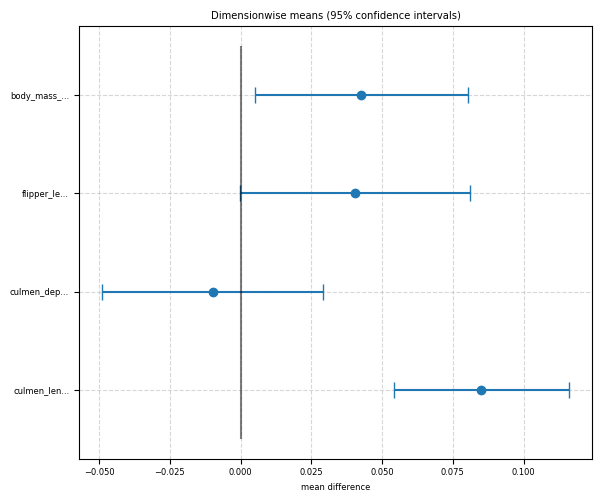

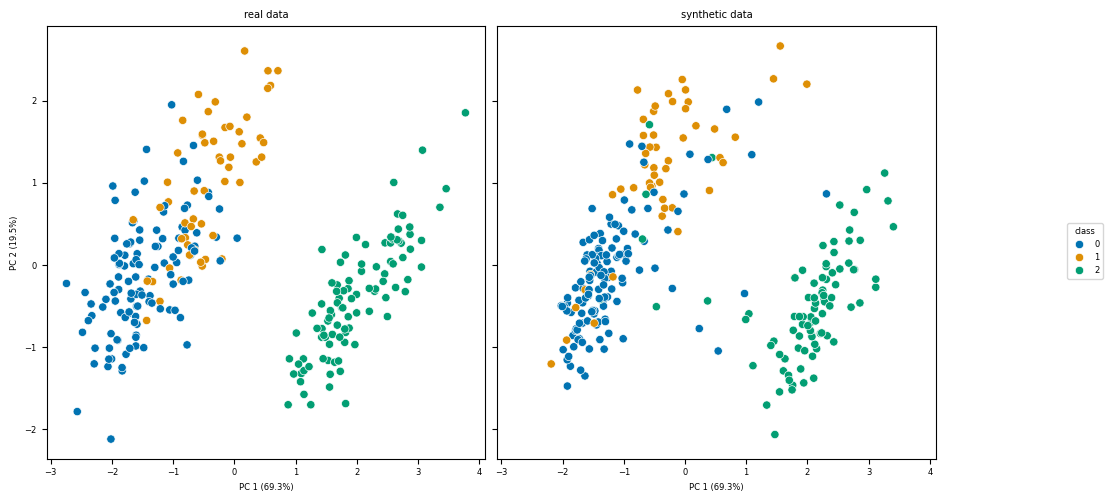

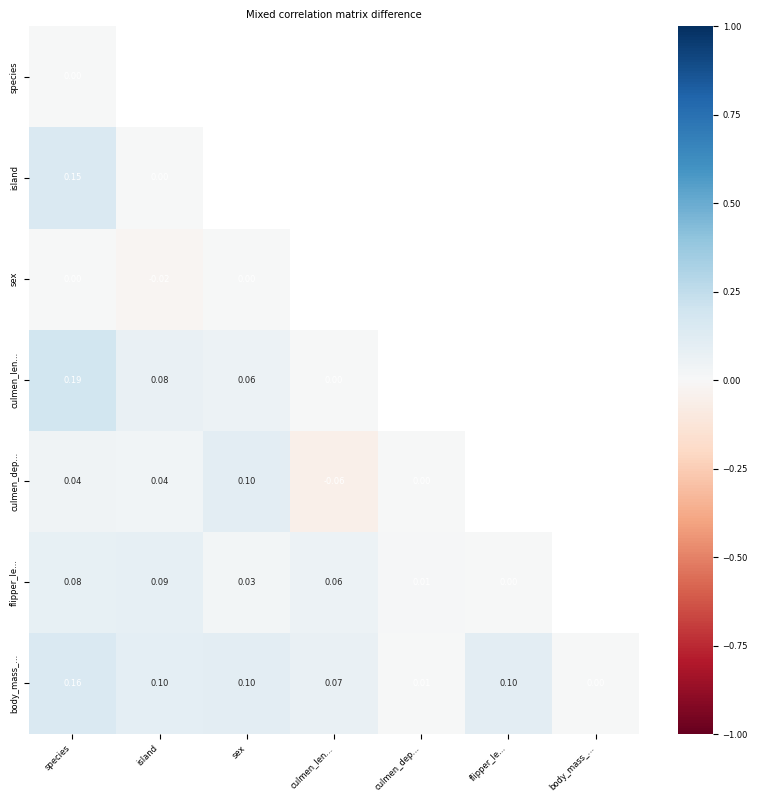

In [134]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(penguins_fake,target_column,"full_eval")

In [135]:
# Concatenate the DataFrames along the rows axis (assuming they have the same columns)
combined_df = pd.concat([penguins_train, penguins_fake], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('penguins_stacked_v1.csv', index=False)

In [175]:
# First stacked Synthesizer test
penguins_stacked = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_stacked_v1.csv")
penguins_stacked = penguins_stacked.dropna()

penguins_stacked.shape[0]

gen_count = penguins_stacked.shape[0]

gen_count

534

In [139]:
Load(penguins_stacked).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Evaluate(target_col='species').Save(name="penguins_ctgan_stacked_v1.csv", key="synth")

 52%|█████▏    | 1049/2000 [02:25<02:11,  7.21it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Chinstrap   Dream              37.0             18.6              191.6   
1    Chinstrap   Dream              45.7             19.3              189.8   
2       Adelie   Dream              36.5             17.3              187.5   
3       Gentoo  Biscoe              45.8             14.2              219.0   
4       Gentoo  Biscoe              47.5             15.0              218.0   
..         ...     ...               ...              ...                ...   
422     Gentoo  Biscoe              44.1             14.3              218.9   
423  Chinstrap   Dream              45.6             19.4              194.0   
424     Gentoo  Biscoe              44.4             17.3              219.0   
425     Gentoo  Biscoe              48.1             15.7              217.4   
426     Gentoo  Biscoe              46.3             14.2              213.3   

     body_mass_g     sex  
0

In [179]:
penguins_ctgan_syn_stack = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stacked_v1.csv").round(1)

#Remove first column from fake
penguins_ctgan_syn_stack = penguins_ctgan_syn_stack.iloc[:, 1:]

penguins_ctgan_syn_stack


species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              44.5             15.7   
1    Chinstrap     Biscoe              45.8             15.8   
2       Gentoo     Biscoe              38.5             21.5   
3       Gentoo     Biscoe              44.7             14.7   
4       Gentoo     Biscoe              43.0             15.6   
..         ...        ...               ...              ...   
529     Adelie  Torgersen              44.9             20.8   
530     Gentoo      Dream              44.5             18.7   
531     Adelie      Dream              38.3             18.7   
532  Chinstrap  Torgersen              43.8             19.9   
533     Gentoo     Biscoe              45.2             15.1   

     flipper_length_mm  body_mass_g     sex  
0                210.3       4796.5    MALE  
1                206.0       4781.5  FEMALE  
2                221.2       4547.1    MALE  
3                208.4       4359.1  FEMALE  
4                209.8       5398.4    MALE  
..                 ...          ...     ...  
529              189.1       3047.9    MALE  
530              216.4       4673.8  FEMALE  
531              189.9       3634.4    MALE  
532              191.5       3313.5    MALE  
533              214.3       5098.7  FEMALE  

[534 rows x 7 columns]

In [184]:
print(penguins_stacked.shape[0])
print(penguins_ctgan_syn_stack.shape[0])
penguins_stacked.dropna()
penguins_ctgan_syn_stack.dropna()
print(penguins_stacked.shape[0])
print(penguins_ctgan_syn_stack.shape[0])

534
534
534
534


In [185]:

# Concatenate the DataFrames along the rows axis (assuming they have the same columns)
combined_df = pd.concat([penguins_stacked, penguins_ctgan_syn_stack], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('penguins_stacked_v2.csv', index=False)

In [220]:
# Second stacked Synthesizer test
penguins_stacked_v2 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_stacked_v2.csv")
#penguins_stacked_v2 = penguins_stacked.dropna()

# Count the number of rows in the penguins_stacked_v2 dataset
gen_count = penguins_stacked_v2.shape[0]
gen_count

1068

In [222]:
Load(penguins_stacked_v2).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Evaluate(target_col='species').Save(name="penguins_ctgan_stacked_v2.csv", key="synth")

 45%|████▍     | 899/2000 [04:05<05:00,  3.67it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0       Adelie   Dream              37.2             19.4              181.8   
1       Gentoo  Biscoe              37.8             15.5              213.0   
2    Chinstrap   Dream              37.7             20.5              183.8   
3       Adelie  Biscoe              38.6             16.3              184.8   
4       Gentoo  Biscoe              46.3             16.5              225.3   
..         ...     ...               ...              ...                ...   
849     Adelie   Dream              36.0             19.5              183.0   
850  Chinstrap   Dream              51.5             18.7              187.0   
851  Chinstrap   Dream              42.5             17.3              187.0   
852     Adelie   Dream              37.5             18.5              199.0   
853     Gentoo  Biscoe              46.6             16.3              223.9   

     body_mass_g     sex  
0

In [223]:
penguins_ctgan_syn_stack_v2 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stacked_v2.csv").round(1)

#Remove first column from fake
penguins_ctgan_syn_stack_v2 = penguins_ctgan_syn_stack_v2.iloc[:, 1:]

penguins_ctgan_syn_stack_v2.shape[0]

1068

In [224]:
# Concatenate the DataFrames along the rows axis (assuming they have the same columns)
combined_df = pd.concat([penguins_stacked_v2, penguins_ctgan_syn_stack_v2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('penguins_stacked_v3.csv', index=False)

In [225]:
# Third stacked Synthesizer test

penguins_stacked_v3 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_stacked_v3.csv")

# Count the number of rows in the penguins_stacked_v3 dataset
gen_count = penguins_stacked_v3.shape[0]
gen_count

2136

In [231]:
Load(penguins_stacked_v3).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Evaluate(target_col='species').Save(name="penguins_ctgan_stacked_v3.csv", key="synth")

 20%|█▉        | 399/2000 [03:23<13:36,  1.96it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie  Torgersen              37.1             19.0   
1     Chinstrap      Dream              36.8             18.1   
2     Chinstrap      Dream              45.5             19.1   
3        Adelie  Torgersen              43.2             17.4   
4        Gentoo     Biscoe              44.8             16.2   
...         ...        ...               ...              ...   
1703  Chinstrap      Dream              46.6             17.8   
1704     Gentoo     Biscoe              48.5             14.1   
1705     Gentoo     Biscoe              44.4             13.8   
1706     Gentoo  Torgersen              43.6             15.4   
1707     Gentoo     Biscoe              45.5             15.0   

      flipper_length_mm  body_mass_g     sex  
0                 190.0       3461.1    MALE  
1                 193.3       3654.3  FEMALE  
2                 207.9       5180.9  FEMALE  
3                 19

In [238]:
# Fourth stacked Synthesizer test

penguins_ctgan_syn_stack_v3 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stacked_v3.csv").round(1)

#Remove first column from fake
penguins_ctgan_syn_stack_v3 = penguins_ctgan_syn_stack_v3.iloc[:, 1:]

#Drop NaN values
penguins_stacked_v3.dropna()
penguins_ctgan_syn_stack_v3.dropna()

#Concatenate the DataFrames along the rows axis (assuming they have the same columns)
combined_df = pd.concat([penguins_stacked_v3, penguins_ctgan_syn_stack_v3], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('penguins_stacked_v4.csv', index=False)

# Declare newest stack to train
penguins_stacked_v4 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_stacked_v4.csv")

penguins_stacked_v4.dropna()

# Count the number of rows in the penguins_stacked_v4 dataset
gen_count = penguins_stacked_v4.shape[0]
gen_count

4272

In [240]:
# Train the newest stack
Load(penguins_stacked_v4).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Evaluate(target_col='species').Save(name="penguins_ctgan_stacked_v4.csv", key="synth")

 22%|██▏       | 449/2000 [08:13<28:24,  1.10s/it]  


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0     Chinstrap      Dream              43.8             20.3   
1        Adelie     Biscoe              36.8             17.8   
2     Chinstrap      Dream              46.4             17.7   
3        Gentoo     Biscoe              36.7             14.2   
4     Chinstrap      Dream              45.9             18.4   
...         ...        ...               ...              ...   
3412     Adelie  Torgersen              35.6             18.4   
3413     Gentoo     Biscoe              43.7             14.1   
3414  Chinstrap      Dream              55.8             19.8   
3415     Adelie     Biscoe              35.8             16.9   
3416     Adelie  Torgersen              36.9             17.9   

      flipper_length_mm  body_mass_g     sex  
0                 178.4       3356.8  FEMALE  
1                 195.8       3737.5  FEMALE  
2                 186.7       3648.6    MALE  
3                 22

In [241]:
# Fifth stacked Synthesizer test

penguins_ctgan_syn_stack_v4 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stacked_v4.csv").round(1)

#Remove first column from fake
penguins_ctgan_syn_stack_v4 = penguins_ctgan_syn_stack_v4.iloc[:, 1:]

#Drop NaN values
penguins_stacked_v4.dropna()
penguins_ctgan_syn_stack_v4.dropna()

#Concatenate the DataFrames along the rows axis (assuming they have the same columns)
combined_df = pd.concat([penguins_stacked_v4, penguins_ctgan_syn_stack_v4], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('penguins_stacked_v5.csv', index=False)

# Declare newest stack to train
penguins_stacked_v5 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_stacked_v5.csv")

penguins_stacked_v5.dropna()

# Count the number of rows in the penguins_stacked_v5 dataset
gen_count = penguins_stacked_v5.shape[0]
gen_count

8544

In [250]:
# Train the newest stack
Load(penguins_stacked_v5).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Evaluate(target_col='species').Save(name="penguins_ctgan_stacked_v5.csv", key="synth")

  0%|          | 9/2000 [00:16<1:01:05,  1.84s/it]


RuntimeError: NaNs detected in the discriminator loss

# Limit testing ctgan model

Is it the data or the model?

In [4]:
# Limit testing ctgan with big datasets - breast_10000 and penguins_10000

big_breast = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\first_test_data\breast-10000.csv")

big_penguin = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\second_test_data_breat+penguin\penguin_city_ctgan-10000.csv").round(1)

medium_penguin = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\second_test_data_breat+penguin\penguin_city_ctgan-1000.csv").round(1)

#Remove first column from fake penguin
big_penguin = big_penguin.iloc[:, 1:]
medium_penguin = medium_penguin.iloc[:, 1:]


In [5]:
big_penguin.dropna()
medium_penguin.dropna()

medium_penguin

species     island  culmen_length_mm  culmen_depth_mm  \
0       Adelie      Dream              37.1             16.3   
1       Gentoo     Biscoe              45.2             14.6   
2    Chinstrap      Dream              47.0             17.3   
3       Adelie  Torgersen              39.1             17.8   
4       Gentoo     Biscoe              40.9             13.1   
..         ...        ...               ...              ...   
995     Adelie     Biscoe              40.6             15.0   
996  Chinstrap      Dream              48.6             17.5   
997     Adelie     Biscoe              37.5             14.8   
998     Gentoo     Biscoe              43.9             13.8   
999     Adelie      Dream              41.0             17.7   

     flipper_length_mm  body_mass_g     sex  
0                186.5       3556.2  FEMALE  
1                213.8       4897.6    MALE  
2                192.0       3822.3  FEMALE  
3                187.1       3549.8  FEMALE  
4                216.0       4756.0    MALE  
..                 ...          ...     ...  
995              190.6       4073.1    MALE  
996              204.5       3983.5  FEMALE  
997              193.7       3455.8  FEMALE  
998              216.9       5057.6    MALE  
999              183.8       3764.0  FEMALE  

[1000 rows x 7 columns]

In [268]:
Load(medium_penguin).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Evaluate(target_col='species').Save(name="medium_penguin_test.csv", key="synth")

 47%|████▋     | 949/2000 [05:10<05:43,  3.06it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Adelie  Torgersen              39.1             18.0   
1    Chinstrap      Dream              46.6             18.0   
2       Adelie     Biscoe              39.1             18.3   
3       Adelie     Biscoe              38.4             18.0   
4       Gentoo  Torgersen              48.6             18.6   
..         ...        ...               ...              ...   
795  Chinstrap      Dream              51.2             14.6   
796     Gentoo     Biscoe              42.5             13.4   
797     Gentoo     Biscoe              43.9             13.6   
798     Adelie      Dream              35.6             16.0   
799  Chinstrap      Dream              46.3             17.7   

     flipper_length_mm  body_mass_g     sex  
0                187.4       3830.9  FEMALE  
1                190.6       3251.7    MALE  
2                188.1       3522.2  FEMALE  
3                208.7       3964.3 

In [6]:
Load(big_penguin).Split(size=0.8).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=1000).Evaluate(target_col='species').Save(name="big_penguin_test.csv", key="synth")

  1%|          | 14/2000 [00:30<1:12:27,  2.19s/it]


RuntimeError: NaNs detected in the generator loss

# Testing other models (adsgan, BN, tvae) to compare against ctgan on training and big data

In [3]:
# Imports

import pandas as pd

from syntheval import SynthEval
from synthesizers import Load

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [11]:
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")


In [12]:
# Generate multiple syn sets of penguins_train using adsgan

for count in (100, 1000, 10000):
    Load(penguins_train).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=count).Save(name=f"penguins_adsgan-{count}.csv", key="synth")

  5%|▌         | 549/10000 [00:54<15:45, 10.00it/s]


In [19]:
# Read the generated datasets, round them to an appropriate number of decimals, and remove the first column
small_penguins_adsgan = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_adsgan-100.csv").round(1)
small_penguins_adsgan = small_penguins_adsgan.iloc[:, 1:]
medium_penguins_adsgan = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_adsgan-1000.csv").round(1)
medium_penguins_adsgan = medium_penguins_adsgan.iloc[:, 1:]
big_penguins_adsgan = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_adsgan-10000.csv").round(1)
big_penguins_adsgan = big_penguins_adsgan.iloc[:, 1:]



In [20]:
# small_penguins_adsgan syn test
Load(small_penguins_adsgan).Split(size=0.8).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=100).Evaluate(target_col='species').Save(name="small_penguins_adsgan_syn_test.csv", key="synth")

  9%|▉         | 949/10000 [00:57<09:08, 16.51it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':       species     island  culmen_length_mm  culmen_depth_mm  \
0      Adelie  Torgersen              40.3             15.5   
1   Chinstrap      Dream              53.8             19.7   
2      Gentoo     Biscoe              48.7             14.5   
3   Chinstrap      Dream              39.7             17.8   
4      Gentoo     Biscoe              51.1             15.7   
..        ...        ...               ...              ...   
75  Chinstrap      Dream              48.5             17.4   
76     Adelie      Dream              41.4             18.1   
77     Adelie      Dream              39.1             18.0   
78     Adelie      Dream              40.7             18.8   
79     Adelie      Dream              42.7             18.8   

    flipper_length_mm  body_mass_g     sex  
0               200.2       3462.0  FEMALE  
1               222.9       6054.8    MALE  
2               219.8       5601.0  FEMALE  
3               194.8       3516.7  FEMALE  
4      

In [21]:
# medium_penguins_adsgan syn test
Load(medium_penguins_adsgan).Split(size=0.8).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=1000).Evaluate(target_col='species').Save(name="medium_penguins_adsgan_syn_test.csv", key="synth")

  7%|▋         | 749/10000 [02:59<36:53,  4.18it/s]  


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0       Adelie   Dream              40.8             19.0              189.6   
1    Chinstrap   Dream              52.2             19.6              199.2   
2       Adelie   Dream              42.1             18.3              190.9   
3       Adelie  Biscoe              41.1             18.9              187.2   
4    Chinstrap   Dream              49.3             17.9              202.8   
..         ...     ...               ...              ...                ...   
795     Gentoo  Biscoe              47.2             14.2              212.2   
796  Chinstrap   Dream              49.3             17.5              192.9   
797     Adelie   Dream              52.8             21.3              218.6   
798     Adelie  Biscoe              40.6             18.2              179.5   
799     Gentoo  Biscoe              45.8             14.4              206.2   

     body_mass_g     sex  
0

In [23]:
# big_penguins_adsgan syn test
Load(big_penguins_adsgan).Split(size=0.8).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=10000).Evaluate(target_col='species').Save(name="big_penguins_adsgan_syn_test.csv", key="synth")

  1%|          | 111/10000 [04:11<6:13:08,  2.26s/it] 


RuntimeError: NaNs detected in the discriminator loss

Test BN syn

In [24]:
# Generate multiple syn sets of penguins_train using bayesian_network
for count in (100, 1000, 10000):
    Load(penguins_train).Train(train_adapter="synthcity", plugin="bayesian_network").Generate(count=count).Save(name=f"penguins_BN_syn-{count}.csv", key="synth")

04/22/2024 15:54:34:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 15:54:34:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 15:54:34:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 15:54:40:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 15:54:40:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 15:54:40:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 15:54:40:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 15:54:40:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/20

In [27]:
small_penguins_BN = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_BN_syn-100.csv").round(1)
small_penguins_BN = small_penguins_BN.iloc[:, 1:]
medium_penguins_BN = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_BN_syn-1000.csv").round(1)
medium_penguins_BN = medium_penguins_BN.iloc[:, 1:]
big_penguins_BN = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_BN_syn-10000.csv").round(1)
big_penguins_BN = big_penguins_BN.iloc[:, 1:]

In [28]:
# Quick Eval test on BN syn data
penguins_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv")

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.

In [29]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res = S.evaluate(small_penguins_BN,target_column,"full_eval")

res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.024394  0.013324  0.975606  0.013324
1    pca_eigval_diff   u  0.066096       NaN  0.933904       NaN
2     pca_eigvec_ang   u  0.057924       NaN  0.981562       NaN
3            avg_cio   u  0.296373  0.173452  0.296373  0.173452
4      corr_mat_diff   u  0.724864       NaN  0.965483       NaN
5    mutual_inf_diff   u  1.040168       NaN  0.950468       NaN
6        ks_tvd_stat   u  0.077030  0.009509  0.922970  0.009509
7       frac_ks_sigs   u  0.000000       NaN  1.000000       NaN
8         avg_h_dist   u  0.387710  0.106596  0.612290  0.106596
9           avg_pMSE   u  0.054182  0.001735  0.783273  0.006939
10          avg_nndr   p  0.745898  0.012687  0.745898  0.012687
11    priv_loss_nndr   p  0.049174  0.022117  0.950826  0.012687
12              nnaa   u  0.512333  0.006199  0.487667  0.006199
13    priv_loss_nnaa   p  0.158637  0.006199  0.841363  0.006199
14       cls_F1_diff   u  0.052500  0.020767  0.947500  0.020767
15  cls_F1_diff_hout   u  0.059701  0.016121  0.940299  0.016121
16        median_DCR   p  1.321355       NaN  0.867120       NaN
17          hit_rate   p  0.037453       NaN  0.962547       NaN
18  eps_identif_risk   p  0.187266       NaN  0.812734       NaN
19      mia_cls_risk   p  0.888235  0.025301  0.111765  0.025301
20    att_discl_risk   p  0.497861  0.124139  0.502139  0.124139

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:02<00:01,  5.24it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0244  0.0133   |
| PCA difference in eigenvalues (exp. var.):   0.0661           |
| PCA angle between eigenvectors (radians) :   0.0579           |
| Average confidence interval overlap      :   0.2964  0.1735   |
|   -> # non-overlapping COIs at 95%       :    1               |
|   -> fraction of non-overlapping CIs     :   0.2500           |
| Mixed correlation matrix difference      :   0.7249           |
| Pairwise mutual information difference   :   1.0402           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0770  0.0095   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0876  0.0136   |
|       -> avg. Total Variation Distance   :   0.0629  0.0095   |
|   -> average combined p-val

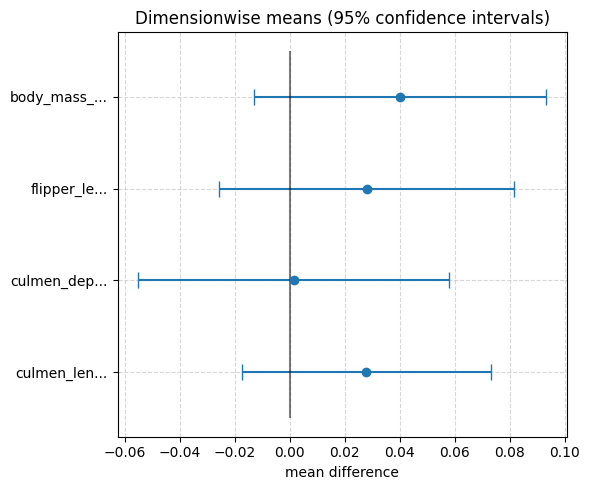

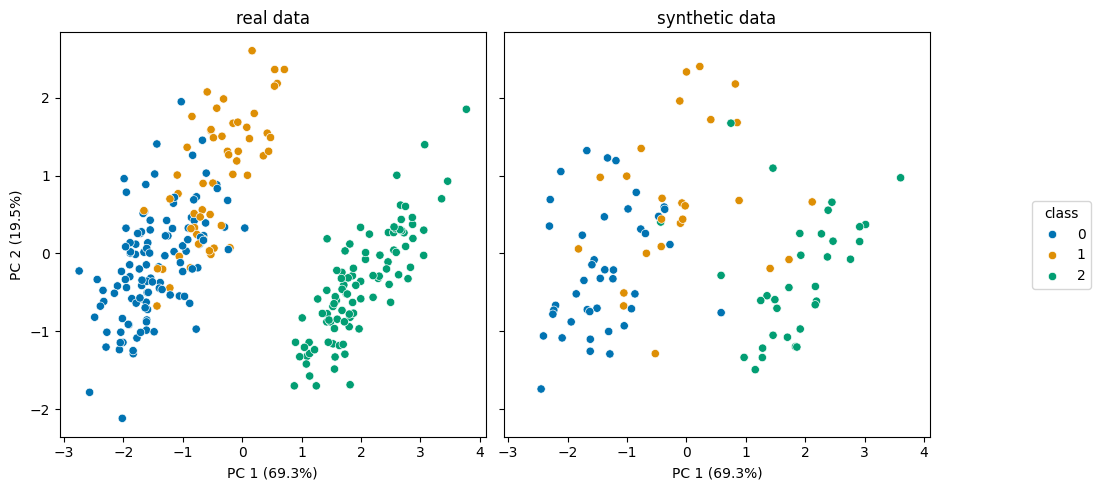

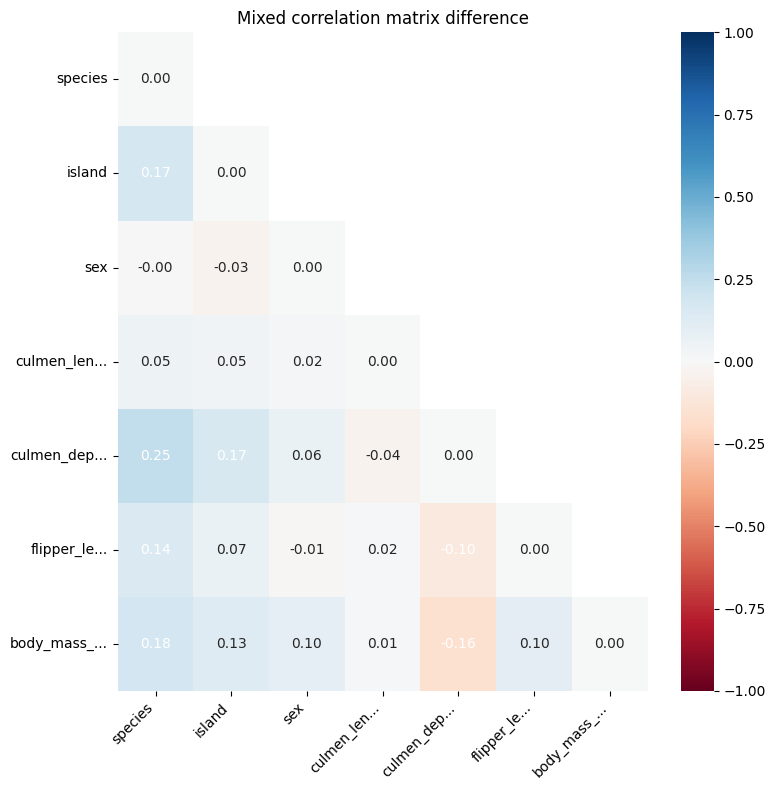

In [30]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(small_penguins_BN,target_column,"full_eval")

In [31]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res = S.evaluate(medium_penguins_BN,target_column,"full_eval")

res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.004557  0.007779  0.995443  0.007779
1    pca_eigval_diff   u  0.126742       NaN  0.873258       NaN
2     pca_eigvec_ang   u  0.105265       NaN  0.966493       NaN
3            avg_cio   u  0.759903  0.005472  0.759903  0.005472
4      corr_mat_diff   u  0.999382       NaN  0.952410       NaN
5    mutual_inf_diff   u  0.738121       NaN  0.964851       NaN
6        ks_tvd_stat   u  0.048448  0.004472  0.951552  0.004472
7       frac_ks_sigs   u  0.000000       NaN  1.000000       NaN
8         avg_h_dist   u  0.249847  0.071460  0.750153  0.071460
9           avg_pMSE   u  0.084190  0.000484  0.663242  0.001938
10          avg_nndr   p  0.712751  0.016499  0.712751  0.016499
11    priv_loss_nndr   p  0.109054  0.026656  0.890946  0.016499
12              nnaa   u  0.450312  0.003563  0.549688  0.003563
13    priv_loss_nnaa   p  0.057151  0.009235  0.942849  0.009235
14       cls_F1_diff   u  0.046890  0.013143  0.953110  0.013143
15  cls_F1_diff_hout   u  0.067164  0.040647  0.932836  0.040647
16        median_DCR   p  1.245820       NaN  0.847107       NaN
17          hit_rate   p  0.400749       NaN  0.599251       NaN
18  eps_identif_risk   p  0.745318       NaN  0.254682       NaN
19      mia_cls_risk   p  1.000000  0.000000  0.000000  0.000000
20    att_discl_risk   p  0.550043  0.116108  0.449957  0.116108

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:04<00:03,  2.15it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0046  0.0078   |
| PCA difference in eigenvalues (exp. var.):   0.1267           |
| PCA angle between eigenvectors (radians) :   0.1053           |
| Average confidence interval overlap      :   0.7599  0.0055   |
|   -> # non-overlapping COIs at 95%       :    0               |
|   -> fraction of non-overlapping CIs     :   0.0000           |
| Mixed correlation matrix difference      :   0.9994           |
| Pairwise mutual information difference   :   0.7381           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0484  0.0045   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0532  0.0044   |
|       -> avg. Total Variation Distance   :   0.0422  0.0081   |
|   -> average combined p-val

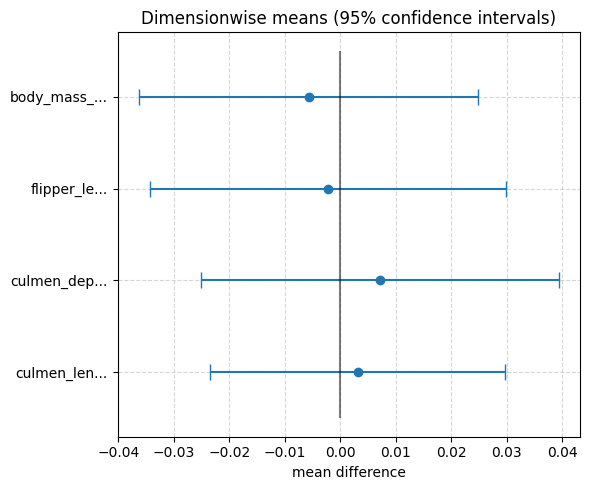

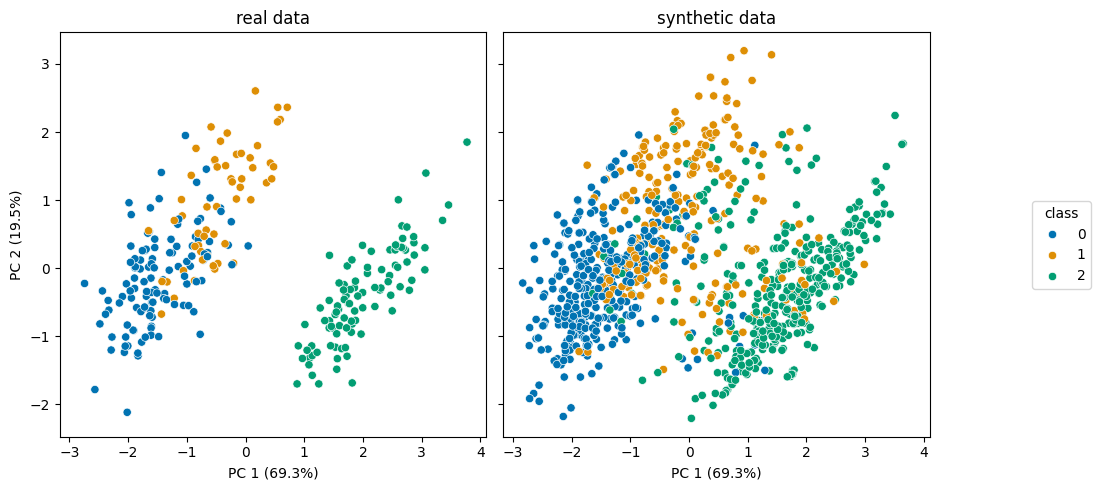

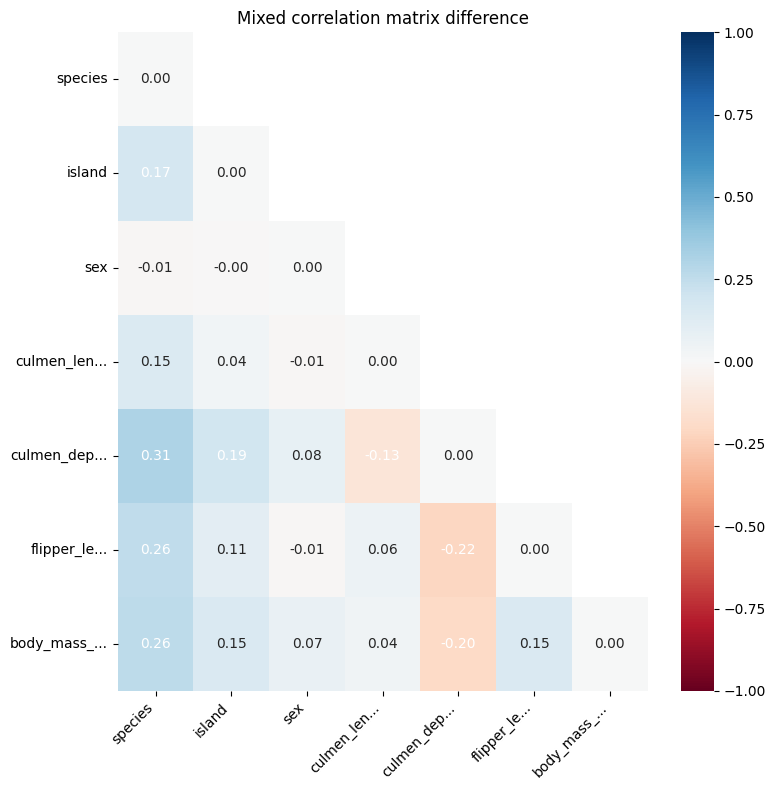

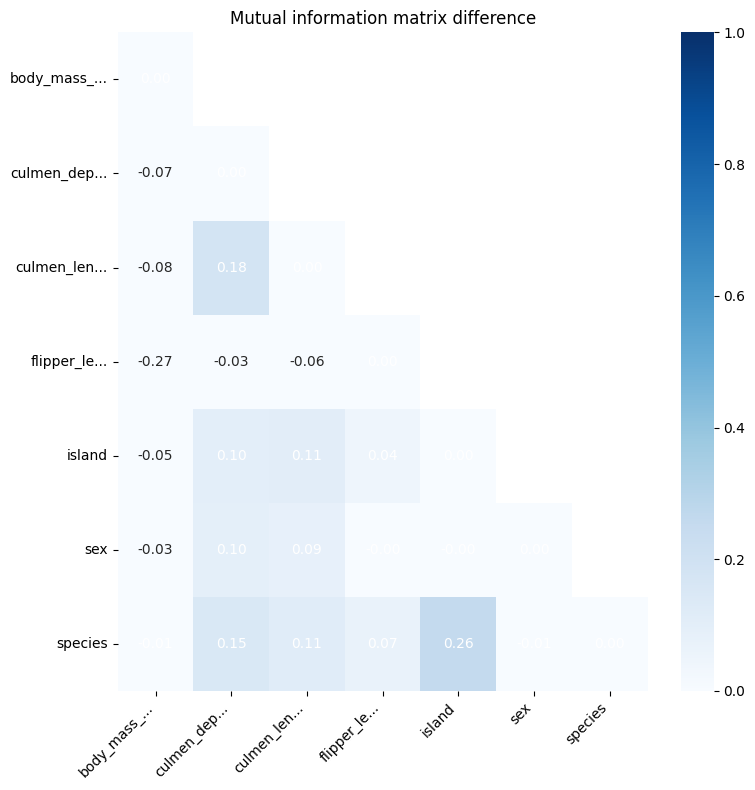

In [32]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(medium_penguins_BN,target_column,"full_eval")

In [33]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res = S.evaluate(big_penguins_BN,target_column,"full_eval")

res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.009106  0.006959  0.990894  0.006959
1    pca_eigval_diff   u  0.113440       NaN  0.886560       NaN
2     pca_eigvec_ang   u  0.102026       NaN  0.967524       NaN
3            avg_cio   u  0.526751  0.057902  0.526751  0.057902
4      corr_mat_diff   u  1.024133       NaN  0.951232       NaN
5    mutual_inf_diff   u  1.176553       NaN  0.943974       NaN
6        ks_tvd_stat   u  0.042983  0.006735  0.957017  0.006735
7       frac_ks_sigs   u  0.000000       NaN  1.000000       NaN
8         avg_h_dist   u  0.184528  0.060928  0.815472  0.060928
9           avg_pMSE   u  0.224289  0.000032  0.102844  0.000127
10          avg_nndr   p  0.632582  0.018703  0.632582  0.018703
11    priv_loss_nndr   p  0.262771  0.024113  0.737229  0.018703
12              nnaa   u  0.467728  0.003211  0.532272  0.003211
13    priv_loss_nnaa   p  0.041476  0.008454  0.958524  0.008454
14       cls_F1_diff   u  0.046803  0.015482  0.953197  0.015482
15  cls_F1_diff_hout   u  0.067164  0.049314  0.932836  0.049314
16        median_DCR   p  1.271749       NaN  0.854271       NaN
17          hit_rate   p  0.756554       NaN  0.243446       NaN
18  eps_identif_risk   p  0.981273       NaN  0.018727       NaN
19      mia_cls_risk   p  1.000000  0.000000  0.000000  0.000000
20    att_discl_risk   p  0.611634  0.093053  0.388366  0.093053

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:09<00:07,  1.07s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:23<00:00,  1.37s/it]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0091  0.0070   |
| PCA difference in eigenvalues (exp. var.):   0.1134           |
| PCA angle between eigenvectors (radians) :   0.1020           |
| Average confidence interval overlap      :   0.5268  0.0579   |
|   -> # non-overlapping COIs at 95%       :    0               |
|   -> fraction of non-overlapping CIs     :   0.0000           |
| Mixed correlation matrix difference      :   1.0241           |
| Pairwise mutual information difference   :   1.1766           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0430  0.0067   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0516  0.0060   |
|       -> avg. Total Variation Distance   :   0.0315  0.0114   |
|   -> average combined p-val

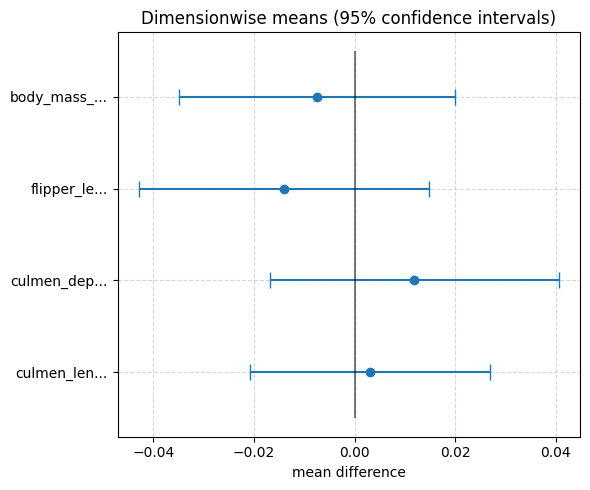

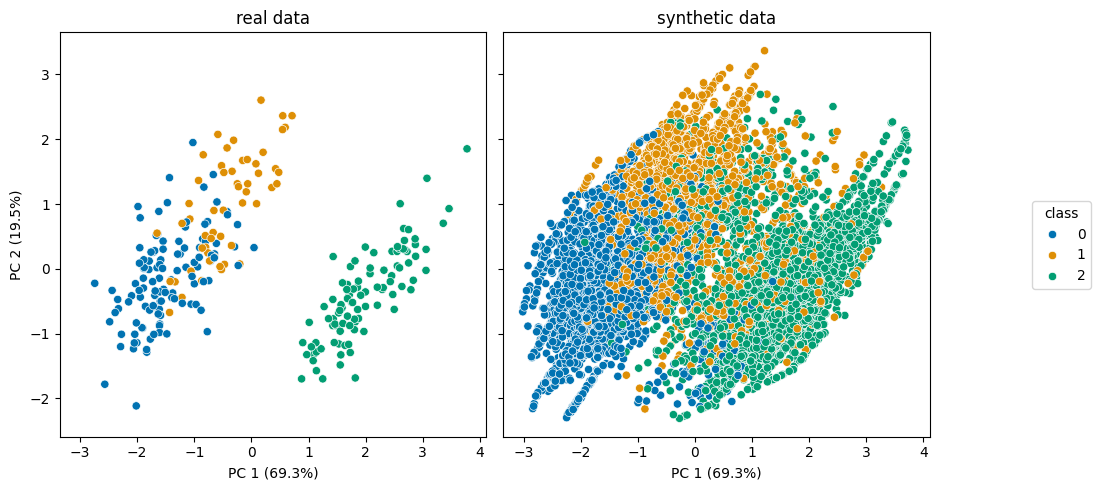

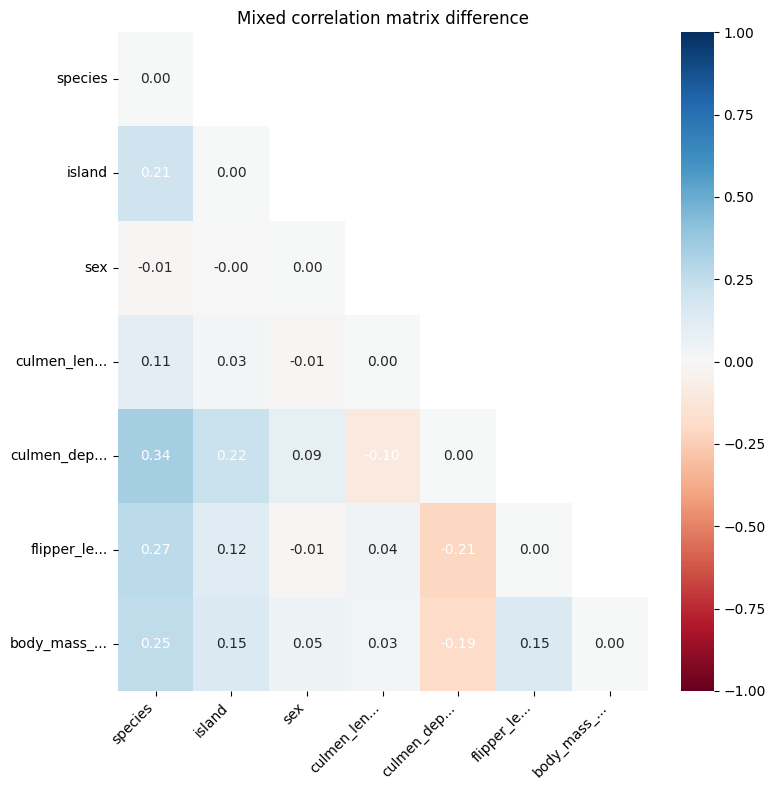

In [34]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(big_penguins_BN,target_column,"full_eval")

Syn testing on penguins_BN

In [35]:
# small_penguins_BN syn test
Load(small_penguins_BN).Split(size=0.8).Train(train_adapter="synthcity", plugin="bayesian_network").Generate(count=100).Evaluate(target_col='species').Save(name="small_penguins_BN_syn_test.csv", key="synth")

04/22/2024 16:08:11:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':       species     island  culmen_length_mm  culmen_depth_mm  \
0      Gentoo     Biscoe              50.1             16.3   
1   Chinstrap      Dream              45.0             16.8   
2      Gentoo     Biscoe              49.1             15.0   
3      Adelie     Biscoe              38.1             19.3   
4   Chinstrap      Dream              52.0             20.7   
..        ...        ...               ...              ...   
75     Adelie  Torgersen              42.6             19.0   
76     Adelie      Dream              42.2             20.7   
77     Adelie      Dream              38.3             16.2   
78     Gentoo     Biscoe              46.3             14.3   
79  Chinstrap      Dream              53.3             20.5   

    flipper_length_mm  body_mass_g     sex  
0               218.3       5373.3    MALE  
1               188.2       3465.9  FEMALE  
2               212.1       5504.9  FEMALE  
3               199.0       4360.5    MALE  
4      

In [36]:
# medium_penguins_BN syn test
Load(medium_penguins_BN).Split(size=0.8).Train(train_adapter="synthcity", plugin="bayesian_network").Generate(count=1000).Evaluate(target_col='species').Save(name="medium_penguins_BN_syn_test.csv", key="synth")

04/22/2024 16:08:16:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Adelie  Torgersen              44.4             18.3   
1       Adelie  Torgersen              42.2             18.6   
2       Adelie      Dream              39.0             19.5   
3       Adelie      Dream              40.6             17.5   
4       Gentoo     Biscoe              47.3             16.5   
..         ...        ...               ...              ...   
795  Chinstrap      Dream              40.7             21.5   
796     Adelie     Biscoe              35.9             16.6   
797     Gentoo     Biscoe              45.1             13.9   
798  Chinstrap      Dream              48.2             17.1   
799     Gentoo     Biscoe              47.6             14.4   

     flipper_length_mm  body_mass_g     sex  
0                190.8       4009.4  FEMALE  
1                202.8       4107.4    MALE  
2                190.7       4049.6    MALE  
3                188.4       3203.6 

In [37]:
# big_penguins_BN syn test
Load(big_penguins_BN).Split(size=0.8).Train(train_adapter="synthcity", plugin="bayesian_network").Generate(count=10000).Evaluate(target_col='species').Save(name="big_penguins_BN_syn_test.csv", key="synth")

04/22/2024 16:08:25:WARNING:Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
04/22/2024 16:08:25:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
04/22/2024 16:08:25:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie     Biscoe              39.7             20.0   
1     Chinstrap      Dream              42.8             18.2   
2        Adelie      Dream              42.0             19.4   
3        Gentoo     Biscoe              47.7             14.5   
4        Adelie  Torgersen              35.6             16.5   
...         ...        ...               ...              ...   
7995     Gentoo     Biscoe              48.1             14.7   
7996     Gentoo      Dream              43.2             15.8   
7997     Gentoo     Biscoe              51.5             14.3   
7998  Chinstrap      Dream              40.8             16.6   
7999     Gentoo     Biscoe              45.9             13.1   

      flipper_length_mm  body_mass_g     sex  
0                 203.0       4725.9    MALE  
1                 189.8       3987.4  FEMALE  
2                 196.5       3519.0  FEMALE  
3                 22

Test tvae syn

In [38]:
# Imports

import pandas as pd

from syntheval import SynthEval
from synthesizers import Load

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [39]:
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")

In [50]:
# Generate multiple syn sets of penguins_train using tvae
for count in (100, 1000, 5000, 10000):
    Load(penguins_train).Train(train_adapter="synthcity", plugin="tvae").Generate(count=count).Save(name=f"penguins_tvae_syn-{count}.csv", key="synth")

 45%|████▌     | 450/1000 [01:07<01:23,  6.62it/s]


In [51]:
# Load the generated datasets, round them to an appropriate number of decimals, and remove the first column
small_penguins_tvae = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_tvae_syn-100.csv").round(1)
small_penguins_tvae = small_penguins_tvae.iloc[:, 1:]
medium_penguins_tvae = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_tvae_syn-1000.csv").round(1)
medium_penguins_tvae = medium_penguins_tvae.iloc[:, 1:]
big_penguins_tvae = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_tvae_syn-5000.csv").round(1)
big_penguins_tvae = big_penguins_tvae.iloc[:, 1:]
huge_penguins_tvae = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_tvae_syn-10000.csv").round(1)
huge_penguins_tvae = huge_penguins_tvae.iloc[:, 1:]


Syn testing on penguins tvae

In [52]:
# small_penguins_tvae syn test
Load(small_penguins_tvae).Split(size=0.8).Train(train_adapter="synthcity", plugin="tvae").Generate(count=100).Evaluate(target_col='species').Save(name="small_penguins_tvae_syn_test.csv", key="synth")

 60%|██████    | 600/1000 [00:39<00:26, 15.09it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0      Gentoo  Biscoe              45.8             15.0              196.0   
1      Gentoo   Dream              51.7             17.6              210.2   
2   Chinstrap  Biscoe              49.4             18.3              188.9   
3   Chinstrap   Dream              44.8             17.2              184.7   
4      Adelie   Dream              48.7             19.0              211.4   
..        ...     ...               ...              ...                ...   
75     Adelie  Biscoe              51.3             18.1              193.0   
76     Gentoo  Biscoe              46.6             14.8              213.3   
77     Gentoo  Biscoe              48.3             15.3              195.3   
78     Adelie  Biscoe              40.5             18.4              184.0   
79     Adelie  Biscoe              39.8             19.1              218.7   

    body_mass_g     sex  
0        5068.

In [53]:
# medium_penguins tvae syn test
Load(medium_penguins_tvae).Split(size=0.8).Train(train_adapter="synthcity", plugin="tvae").Generate(count=1000).Evaluate(target_col='species').Save(name="medium_penguins_tvae_syn_test.csv", key="synth")

 45%|████▌     | 450/1000 [02:38<03:14,  2.83it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Adelie     Biscoe              39.8             19.2   
1       Gentoo     Biscoe              45.7             14.6   
2       Adelie      Dream              38.1             18.3   
3       Adelie  Torgersen              46.9             14.3   
4       Gentoo     Biscoe              39.9             14.3   
..         ...        ...               ...              ...   
795     Gentoo     Biscoe              47.0             14.5   
796     Gentoo     Biscoe              47.7             14.3   
797     Gentoo     Biscoe              39.6             14.3   
798     Adelie     Biscoe              38.7             17.4   
799  Chinstrap      Dream              50.1             19.0   

     flipper_length_mm  body_mass_g     sex  
0                192.9       3565.2    MALE  
1                211.4       3750.8  FEMALE  
2                218.5       3674.3  FEMALE  
3                227.2       4969.3 

In [58]:
# big_penguins tvae syn test
Load(big_penguins_tvae).Split(size=0.8).Train(train_adapter="synthcity", plugin="tvae").Generate(count=5000).Evaluate(target_col='species').Save(name="big_penguins_tvae_syn_test.csv", key="synth")

 55%|█████▌    | 550/1000 [17:47<14:33,  1.94s/it]


RuntimeError: NaNs detected in the reconstruction_loss

In [ ]:
# huge_penguins tvae syn test
Load(huge_penguins_tvae).Split(size=0.8).Train(train_adapter="synthcity", plugin="tvae").Generate(count=10000).Evaluate(target_col='species').Save(name="huge_penguins_tvae_syn_test.csv", key="synth")